In [1]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import subprocess
from time import sleep
import os

Alex's code pulling together the E1 dmers experiment results:

In [2]:
dmers_path = '/home/alex_o/dmers_trial/experiment_1/test_dmers' #all the dmers of all the indiv against the entire set from E1 (all older than 11KYA)
slim_labels_test = '/home/alex_o/s3-drive/alexo/slim_old/truth_gai_testset.txt' #has the correct ancestry for each simulated indiv
okg_labels = '/home/alex_o/s3-drive/alexo/igsr-1000 genomes 30x on grch38 23Levels.csv'
#orginal 1kg labels for each individual

In [3]:
samples_info_test = pd.read_csv(slim_labels_test, sep='\t')
okg_info = pd.read_csv(okg_labels, sep=',')


In [4]:
input_data_path = "/mnt/efs/data/1-k-genomes/Standard/GRCh38/simulations/chr20"
ancient_genomes_path = input_data_path + "/Test.chr20.GTypes_ren.vcf"
ancient_names_path = input_data_path + "/slim_sample_names.txt"


In [5]:
name_list = open(ancient_names_path, "r")
nl = name_list.readlines()
name_list.close()
nl = [x.strip() for x in nl]
 #list of all samples in the SLIM simulation and 1kg train set

In [23]:
pop_map_dict = {'BEB': 0, 'CDX': 1, 'CHB': 2, 'CHS': 2, 'FIN': 3, 'GBR': 4, 'GIH': 5, 'GWD': 6, 'IBS': 7,
                'JPT': 8, 'KHV': 9, 'LWK': 10, 'MSL': 11, 'ESN': 12, 'YRI': 12, 'PJL': 13, 'ITU': 14, 'STU': 14, 'TSI': 15}
for i in range(len(okg_info)):
    if okg_info['Sample name'].iloc[i] in np.array(nl):
        tmp_sam = np.zeros(16)
        tmp_sam_name = okg_info['Sample name'].iloc[i]
        tmp_sam[pop_map_dict[okg_info[okg_info['Sample name'] ==
                                      tmp_sam_name[:]]['Population code'].values[0]]] = 100
        samples_info_test.loc[tmp_sam_name+'.0'] = tmp_sam.copy()
        samples_info_test.loc[tmp_sam_name+'.1'] = tmp_sam.copy()

In [25]:
print(tmp_sam, samples_info_test)

[  0.   0.   0.   0.   0. 100.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.]                       BEB  CDX  CHN    FIN    GBR    GIH  GWD    IBS  JPT  \
i0_EUR_generation1.0  0.0  0.0  0.0    0.0    0.0    0.0  0.0    0.0  0.0   
i0_EUR_generation1.1  0.0  0.0  0.0    0.0  100.0    0.0  0.0    0.0  0.0   
i1_EUR_generation1.0  0.0  0.0  0.0    0.0  100.0    0.0  0.0    0.0  0.0   
i1_EUR_generation1.1  0.0  0.0  0.0  100.0    0.0    0.0  0.0    0.0  0.0   
i2_EUR_generation1.0  0.0  0.0  0.0    0.0    0.0    0.0  0.0  100.0  0.0   
...                   ...  ...  ...    ...    ...    ...  ...    ...  ...   
NA20765.1             0.0  0.0  0.0    0.0    0.0    0.0  0.0    0.0  0.0   
NA20847.0             0.0  0.0  0.0    0.0    0.0  100.0  0.0    0.0  0.0   
NA20847.1             0.0  0.0  0.0    0.0    0.0  100.0  0.0    0.0  0.0   
NA21117.0             0.0  0.0  0.0    0.0    0.0  100.0  0.0    0.0  0.0   
NA21117.1             0.0  0.0  0.0    0.0    0.0  100.0  0.0    0.0  

In [30]:
dmer_files = [f for f in listdir(dmers_path) if isfile(join(dmers_path, f))]
dmer_files_df = pd.DataFrame(dmer_files, columns=['filename'])
"""
Dataframe here contains only the filenames for all the dmer output files
"""
os.stat(join(dmers_path, dmer_files[0])).st_size
 #returns the size of the file in bytes to give us an idea of dmer matches

566

In [31]:
dmer_files_df.drop(dmer_files_df[dmer_files_df['filename'] == 'capture.txt'].index, inplace=True)
def hap_func(row):
    return row[-5:-4]
def ref_func(row):
    return row.split("_with_",1)[0]
def sample_func(row):
    return row.split("_with_",1)[1][:-6]
def admixed_func(row):
    return True if row[0] == 'i' and row[1].isnumeric() else False
def size_func(row):
    return os.stat(join(dmers_path,row)).st_size


dmer_files_df['ref_name'] = dmer_files_df['filename'].apply(ref_func)
dmer_files_df['sample_name'] = dmer_files_df['filename'].apply(sample_func)
dmer_files_df['haplotype'] = dmer_files_df['filename'].apply(hap_func)
dmer_files_df['admixed'] = dmer_files_df['sample_name'].apply(admixed_func)
dmer_files_df['size'] = dmer_files_df['filename'].apply(size_func)

dmer_files_df_pure = dmer_files_df[dmer_files_df['admixed'] == False]

def pop_func(row):
    return np.argmax(samples_info_test[samples_info_test.index == row + '.0'])



In [32]:

def anc_func(row):
    pop_name=row.split("_")
    if len(pop_name)>1:
        return pop_name[1]
    else:
        return okg_pop(pop_name[0])
        
def okg_pop(name):
    name_index=okg_info.index


In [33]:
okg_info

Unnamed: 0 Sample name     Sex  Biosample ID Population code  \
0              0     HG00315  female    SAME124335             FIN   
1              1     HG00327  female    SAME123791             FIN   
2              2     HG00334  female    SAME123981             FIN   
3              3     HG00339  female    SAME123991             FIN   
4              4     HG00341    male    SAME124922             FIN   
...          ...         ...     ...           ...             ...   
3197        3197     NA21092    male    SAME123322             GIH   
3198        3198     NA21117    male    SAME124185             GIH   
3199        3199     NA21124    male    SAME124024             GIH   
3200        3200     NA21129    male    SAME124023             GIH   
3201        3201     NA12236  female  SAMEA6604124             CEU   

     Population name Superpopulation code  Superpopulation name  \
0            Finnish                  EUR     European Ancestry   
1            Finnish                  EUR     European Ancestry   
2            Finnish                  EUR     European Ancestry   
3            Finnish                  EUR     European Ancestry   
4            Finnish                  EUR     European Ancestry   
...              ...                  ...                   ...   
3197        Gujarati                  SAS  South Asian Ancestry   
3198        Gujarati                  SAS  South Asian Ancestry   
3199        Gujarati                  SAS  South Asian Ancestry   
3200        Gujarati                  SAS  South Asian Ancestry   
3201            CEPH                  EUR     European Ancestry   

     Population elastic ID                                   Data collections  \
0                      FIN  1000 Genomes on GRCh38,1000 Genomes 30x on GRC...   
1                      FIN  1000 Genomes on GRCh38,1000 Genomes 30x on GRC...   
2                      FIN  1000 Genomes on GRCh38,1000 Genomes 30x on GRC...   
3                      FIN  1000 Genomes on GRCh38,1000 Genomes 30x on GRC...   
4                      FIN  1000 Genomes on GRCh38,1000 Genomes 30x on GRC...   
...                    ...                                                ...   
3197                   GIH  1000 Genomes on GRCh38,1000 Genomes 30x on GRC...   
3198                   GIH  1000 Genomes on GRCh38,1000 Genomes 30x on GRC...   
3199                   GIH  1000 Genomes on GRCh38,1000 Genomes 30x on GRC...   
3200                   GIH  1000 Genomes on GRCh38,1000 Genomes 30x on GRC...   
3201                   CEU                         1000 Genomes 30x on GRCh38   

                         Level Two Level Three  
0                      NW European      Finish  
1                      NW European      Finish  
2                      NW European      Finish  
3                      NW European      Finish  
4                      NW European      Finish  
...                            ...         ...  
3197  C Asian, N Indian, Pakistani     Gujarat  
3198  C Asian, N Indian, Pakistani     Gujarat  
3199  C Asian, N Indian, Pakistani     Gujarat  
3200  C Asian, N Indian, Pakistani     Gujarat  
3201                           NaN         NaN  

[3202 rows x 12 columns]

In [34]:
from re import search
dmer_files_pop=dmer_files_df

dmer_files_pop['population']=dmer_files_pop['sample_name'].apply(anc_func)

In [12]:
dmer_files_pop

filename  \
0          Iboussieres25-1_with_i43_SAS_generation5_1.csv   
1                    I6744_with_i46_SAS_generation3_0.csv   
2            Vestonice43_d_with_i16_SAS_generation6_0.csv   
3          I1072_published_with_i35_SAS_generation1_0.csv   
4             I6767_all.SG_with_i63_EUR_generation2_0.csv   
...                                                   ...   
665746              TAF010_with_i64_EUR_generation3_0.csv   
665747        Vestonice13_d_with_i2_AFR_generation3_1.csv   
665748                Vindija_snpAD.DG_with_HG00476_0.csv   
665749  LesCloseaux13_published_d_with_i39_AFR_generat...   
665750  Paglicci133_published_with_i28_EUR_generation3...   

                         ref_name          sample_name haplotype  admixed  \
0                 Iboussieres25-1  i43_SAS_generation5         1     True   
1                           I6744  i46_SAS_generation3         0     True   
2                   Vestonice43_d  i16_SAS_generation6         0     True   
3                 I1072_published  i35_SAS_generation1         0     True   
4                    I6767_all.SG  i63_EUR_generation2         0     True   
...                           ...                  ...       ...      ...   
665746                     TAF010  i64_EUR_generation3         0     True   
665747              Vestonice13_d   i2_AFR_generation3         1     True   
665748           Vindija_snpAD.DG              HG00476         0    False   
665749  LesCloseaux13_published_d  i39_AFR_generation1         1     True   
665750      Paglicci133_published  i28_EUR_generation3         1     True   

         size population  
0         566        SAS  
1         626        SAS  
2         556        SAS  
3        2710        SAS  
4       10379        EUR  
...       ...        ...  
665746   6795        EUR  
665747    672        AFR  
665748  15274       None  
665749    616        AFR  
665750    596        EUR  

[665750 rows x 7 columns]

In [13]:
dmer_files_df['Population']=dmer_files_df['sample_name'].apply(anc_func)

In [14]:
dmer_files_df

filename  \
0          Iboussieres25-1_with_i43_SAS_generation5_1.csv   
1                    I6744_with_i46_SAS_generation3_0.csv   
2            Vestonice43_d_with_i16_SAS_generation6_0.csv   
3          I1072_published_with_i35_SAS_generation1_0.csv   
4             I6767_all.SG_with_i63_EUR_generation2_0.csv   
...                                                   ...   
665746              TAF010_with_i64_EUR_generation3_0.csv   
665747        Vestonice13_d_with_i2_AFR_generation3_1.csv   
665748                Vindija_snpAD.DG_with_HG00476_0.csv   
665749  LesCloseaux13_published_d_with_i39_AFR_generat...   
665750  Paglicci133_published_with_i28_EUR_generation3...   

                         ref_name          sample_name haplotype  admixed  \
0                 Iboussieres25-1  i43_SAS_generation5         1     True   
1                           I6744  i46_SAS_generation3         0     True   
2                   Vestonice43_d  i16_SAS_generation6         0     True   
3                 I1072_published  i35_SAS_generation1         0     True   
4                    I6767_all.SG  i63_EUR_generation2         0     True   
...                           ...                  ...       ...      ...   
665746                     TAF010  i64_EUR_generation3         0     True   
665747              Vestonice13_d   i2_AFR_generation3         1     True   
665748           Vindija_snpAD.DG              HG00476         0    False   
665749  LesCloseaux13_published_d  i39_AFR_generation1         1     True   
665750      Paglicci133_published  i28_EUR_generation3         1     True   

         size population Population  
0         566        SAS        SAS  
1         626        SAS        SAS  
2         556        SAS        SAS  
3        2710        SAS        SAS  
4       10379        EUR        EUR  
...       ...        ...        ...  
665746   6795        EUR        EUR  
665747    672        AFR        AFR  
665748  15274       None       None  
665749    616        AFR        AFR  
665750    596        EUR        EUR  

[665750 rows x 8 columns]

Outputting the resulting dmer dataframes to csv files to load in for analysis

In [15]:
dmer_files_df.to_csv("~/dmer_files.csv", sep="\t")
dmer_files_df_pure.to_csv("~/dmer_files_pure.csv", sep="\t")

Sort by size of the dmer matches for each ref to sample combination

In [16]:
dmer_filfes_df_sorted=dmer_files_df.sort_values(by=['size'])
dmer_filfes_df_sorted


filename  \
557397           Ash128.SG_with_i23_EUR_generation3_0.csv   
485789               RIP001_with_i8_SAS_generation5_0.csv   
72729               RIP001_with_i14_EUR_generation5_1.csv   
214976           Ash128.SG_with_i18_AFR_generation2_0.csv   
606084           Ash128.SG_with_i64_AFR_generation1_1.csv   
...                                                   ...   
560428  Ust_Ishim_published.DG_with_i96_SAS_generation...   
292570  Ust_Ishim_published.DG_with_i78_SAS_generation...   
509494  Ust_Ishim_published.DG_with_i43_EUR_generation...   
602634  Ust_Ishim_published.DG_with_i12_EAS_generation...   
494163  Ust_Ishim_published.DG_with_i54_EAS_generation...   

                      ref_name          sample_name haplotype  admixed   size  \
557397               Ash128.SG  i23_EUR_generation3         0     True    228   
485789                  RIP001   i8_SAS_generation5         0     True    228   
72729                   RIP001  i14_EUR_generation5         1     True    228   
214976               Ash128.SG  i18_AFR_generation2         0     True    228   
606084               Ash128.SG  i64_AFR_generation1         1     True    228   
...                        ...                  ...       ...      ...    ...   
560428  Ust_Ishim_published.DG  i96_SAS_generation6         1     True  59014   
292570  Ust_Ishim_published.DG  i78_SAS_generation6         1     True  59014   
509494  Ust_Ishim_published.DG  i43_EUR_generation4         0     True  59082   
602634  Ust_Ishim_published.DG  i12_EAS_generation4         1     True  59176   
494163  Ust_Ishim_published.DG  i54_EAS_generation3         1     True  59386   

       population Population  
557397        EUR        EUR  
485789        SAS        SAS  
72729         EUR        EUR  
214976        AFR        AFR  
606084        AFR        AFR  
...           ...        ...  
560428        SAS        SAS  
292570        SAS        SAS  
509494        EUR        EUR  
602634        EAS        EAS  
494163        EAS        EAS  

[665750 rows x 8 columns]

In [17]:

dmer_files_df_pure = dmer_files_df[dmer_files_df['admixed'] == False]
dmer_files_df_pure['pop'] = dmer_files_df_pure['sample_name'].apply(pop_func)
dmer_files_df_pure


/tmp/ipykernel_2418125/2014991230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dmer_files_df_pure['pop'] = dmer_files_df_pure['sample_name'].apply(pop_func)


filename  \
6                        Tianyuan_with_HG02783_0.csv   
12                          I5235_with_HG01794_1.csv   
28                    Sunghir3.SG_with_HG02154_0.csv   
34                       GoyetQ-2_with_HG00375_1.csv   
38                            PM1_with_HG03469_1.csv   
...                                              ...   
665730                      I0861_with_NA19324_1.csv   
665731  Iboussieres39_published_d_with_NA20814_0.csv   
665737              Vestonice13_d_with_HG02694_0.csv   
665740     Ust_Ishim_published.DG_with_HG03382_0.csv   
665748           Vindija_snpAD.DG_with_HG00476_0.csv   

                         ref_name sample_name haplotype  admixed   size  \
6                        Tianyuan     HG02783         0    False   6217   
12                          I5235     HG01794         1    False   5632   
28                    Sunghir3.SG     HG02154         0    False   8754   
34                       GoyetQ-2     HG00375         1    False   1222   
38                            PM1     HG03469         1    False   7823   
...                           ...         ...       ...      ...    ...   
665730                      I0861     NA19324         1    False    602   
665731  Iboussieres39_published_d     NA20814         0    False    604   
665737              Vestonice13_d     HG02694         0    False    544   
665740     Ust_Ishim_published.DG     HG03382         0    False  45511   
665748           Vindija_snpAD.DG     HG00476         0    False  15274   

       population Population  pop  
6            None       None   13  
12           None       None    1  
28           None       None    1  
34           None       None    3  
38           None       None   11  
...           ...        ...  ...  
665730       None       None   10  
665731       None       None   15  
665737       None       None   13  
665740       None       None   11  
665748       None       None    2  

[65750 rows x 9 columns]

Sort by size to look into the lengths of dmer matches -- Alex's code

In [18]:
dmer_files_df_pure.sort_values(by=['size'], ascending=False)

filename                ref_name  \
325843  Ust_Ishim_published.DG_with_HG01794_0.csv  Ust_Ishim_published.DG   
525864  Ust_Ishim_published.DG_with_HG00500_0.csv  Ust_Ishim_published.DG   
384221  Ust_Ishim_published.DG_with_NA18974_1.csv  Ust_Ishim_published.DG   
324172  Ust_Ishim_published.DG_with_HG02374_0.csv  Ust_Ishim_published.DG   
224288  Ust_Ishim_published.DG_with_HG01845_1.csv  Ust_Ishim_published.DG   
...                                           ...                     ...   
143190               Ash128.SG_with_HG03743_0.csv               Ash128.SG   
656634               Ash128.SG_with_HG03271_1.csv               Ash128.SG   
451635               Ash128.SG_with_HG02891_1.csv               Ash128.SG   
314297               Ash128.SG_with_NA19403_0.csv               Ash128.SG   
398337                  RIP001_with_HG03479_0.csv                  RIP001   

       sample_name haplotype  admixed   size population Population  pop  
325843     HG01794         0    False  54211       None       None    1  
525864     HG00500         0    False  54157       None       None    2  
384221     NA18974         1    False  53918       None       None    8  
324172     HG02374         0    False  53750       None       None    1  
224288     HG01845         1    False  53699       None       None    9  
...            ...       ...      ...    ...        ...        ...  ...  
143190     HG03743         0    False    228       None       None   14  
656634     HG03271         1    False    228       None       None   12  
451635     HG02891         1    False    228       None       None    6  
314297     NA19403         0    False    228       None       None   10  
398337     HG03479         0    False    228       None       None   11  

[65750 rows x 9 columns]

In [19]:
most_dmers = dmer_files_df_pure.groupby('ref_name')['size'].sum()
#most_dmers.columns = most_dmers.columns.append('total_size')
#most_dmers.sort_values(ascending=False)[:30]
most_dmers_sorted=most_dmers.sort_values(ascending=False)
most_dmers_sorted [:30]

ref_name
Ust_Ishim_published.DG               25139979
Altai_published.DG                   11668852
Denisova_published.DG                 9965172
Chagyrskaya.SG                        9075876
Vindija_snpAD.DG                      8821942
Sunghir4.SG                           4816139
Sunghir3.SG                           4721076
Bichon.SG                             4653609
Yana_old2.SG                          4614494
Sunghir2.SG                           4565027
Yana_old.SG                           4541567
I6767_all.SG                          4474286
R7.SG                                 4458287
PM1                                   4336882
Kostenki14                            4192726
PES001.SG                             4096654
TAF013                                3962952
NE20                                  3920953
Bon002.SG                             3805895
TAF011                                3796594
TAF014                                3783249
ZBC_IPB001.B-C0101_Luk2-P

(mine) looking into average dmer match lengths for each reference ancient genome

In [20]:
avg_num_dmers = dmer_files_df_pure.groupby('ref_name')['size'].mean()
avg_dmers_sorted=avg_num_dmers.sort_values(ascending=False)
avg_dmers_sorted.to_csv("~/sorted_aDNA_dmers.csv", sep="\t")
avg_dmers_sorted

PermissionError: [Errno 13] Permission denied: '/home/rupa/sorted_aDNA_dmers.csv'

Group by ancient genome and population, then sort by size to look into the results 

In [ ]:
pop_dmers = dmer_files_df_pure.groupby(['ref_name', 'pop'])['size'].sum()
pop_dmers


ref_name          pop
AfontovaGora2.SG  0      15287
                  1      19862
                  2      23321
                  3      22107
                  4      14855
                         ...  
yak025.SG         11     23198
                  12     30058
                  13      8798
                  14     28433
                  15     28123
Name: size, Length: 2000, dtype: int64

Save the resulting dataframes to files to load in

Delete the index 

In [ ]:
avg_dmers_df=pd.read_csv("~/sorted_aDNA_dmers.csv", sep="\t")
#load in the dmers files from E1
#to be able to map and plot by ref_name vs sample of dmer lengths/matches
dmer_files_pure = pd.read_csv("~/dmer_files_pure.csv", sep="\t")
dmer_files_all=pd.read_csv("~/dmer_files.csv", sep="\t")
del dmer_files_all['Unnamed: 0']
del dmer_files_pure['Unnamed: 0']



In [ ]:
all_avgs_dmers=dmer_files_df.groupby('ref_name')['size'].mean()

In [ ]:
all_avgs_dmers


ref_name
AfontovaGora2.SG                       595.730567
AfontovaGora3_d                        998.187946
Altai_published.DG                   23148.987608
Ash128.SG                              228.000000
BAL003.A0101                           549.767931
                                         ...     
Yana_old2.SG                          9613.858806
ZBC_IPB001.B-C0101_Luk2-Pinarbasi     7572.429403
ZHJ_BON024.A0101_Luk84                2835.679497
salkhit1.SG                            601.179497
yak025.SG                              757.425272
Name: size, Length: 125, dtype: float64

In [ ]:
def avg_dmers(row):
    avg_dmer=all_avgs_dmers.loc[row]
    return avg_dmer
dmer_files_df['avg size']=dmer_files_df['ref_name'].apply(avg_dmers)

In [ ]:
def stdev_dmers(row):
    stdev_dmer=

SyntaxError: unexpected EOF while parsing (2362834618.py, line 1)

In [ ]:
dmer_files_df['normalized_dmers']=dmer_files_df['size']/dmer_files_df['avg size']

In [ ]:
dmer_files_df.to_csv("~/avgs.csv", sep="\t")

In [ ]:
norm_dmers_sorted = dmer_files_df.sort_values(['population', 'normalized_dmers'])


In [ ]:
dmer_files_df

filename  \
0          Iboussieres25-1_with_i43_SAS_generation5_1.csv   
1                    I6744_with_i46_SAS_generation3_0.csv   
2            Vestonice43_d_with_i16_SAS_generation6_0.csv   
3          I1072_published_with_i35_SAS_generation1_0.csv   
4             I6767_all.SG_with_i63_EUR_generation2_0.csv   
...                                                   ...   
665746              TAF010_with_i64_EUR_generation3_0.csv   
665747        Vestonice13_d_with_i2_AFR_generation3_1.csv   
665748                Vindija_snpAD.DG_with_HG00476_0.csv   
665749  LesCloseaux13_published_d_with_i39_AFR_generat...   
665750  Paglicci133_published_with_i28_EUR_generation3...   

                         ref_name          sample_name haplotype  admixed  \
0                 Iboussieres25-1  i43_SAS_generation5         1     True   
1                           I6744  i46_SAS_generation3         0     True   
2                   Vestonice43_d  i16_SAS_generation6         0     True   
3                 I1072_published  i35_SAS_generation1         0     True   
4                    I6767_all.SG  i63_EUR_generation2         0     True   
...                           ...                  ...       ...      ...   
665746                     TAF010  i64_EUR_generation3         0     True   
665747              Vestonice13_d   i2_AFR_generation3         1     True   
665748           Vindija_snpAD.DG              HG00476         0    False   
665749  LesCloseaux13_published_d  i39_AFR_generation1         1     True   
665750      Paglicci133_published  i28_EUR_generation3         1     True   

         size population Population      avg size  normalized_dmers  
0         566        SAS        SAS    566.896545          0.998419  
1         626        SAS        SAS    538.004318          1.163559  
2         556        SAS        SAS    564.478596          0.984980  
3        2710        SAS        SAS   2181.283139          1.242388  
4       10379        EUR        EUR   9379.044123          1.106616  
...       ...        ...        ...           ...               ...  
665746   6795        EUR        EUR   6118.334022          1.110596  
665747    672        AFR        AFR    652.966016          1.029150  
665748  15274       None       None  17577.773939          0.868938  
665749    616        AFR        AFR    614.767931          1.002004  
665750    596        EUR        EUR    605.963387          0.983558  

[665750 rows x 10 columns]

In [ ]:
dmer_files_all.head()

filename         ref_name  \
0  Iboussieres25-1_with_i43_SAS_generation5_1.csv  Iboussieres25-1   
1            I6744_with_i46_SAS_generation3_0.csv            I6744   
2    Vestonice43_d_with_i16_SAS_generation6_0.csv    Vestonice43_d   
3  I1072_published_with_i35_SAS_generation1_0.csv  I1072_published   
4     I6767_all.SG_with_i63_EUR_generation2_0.csv     I6767_all.SG   

           sample_name  haplotype  admixed   size population Population  
0  i43_SAS_generation5          1     True    566        SAS        SAS  
1  i46_SAS_generation3          0     True    626        SAS        SAS  
2  i16_SAS_generation6          0     True    556        SAS        SAS  
3  i35_SAS_generation1          0     True   2710        SAS        SAS  
4  i63_EUR_generation2          0     True  10379        EUR        EUR

In [ ]:
all_dmers_sorted = dmer_files_all.sort_values(['population', 'size'])
pure_dmers_sorted = dmer_files_pure.sort_values(['ref_name', 'size'])



In [ ]:
all_dmers_normalized=dmer_files_all  
okg_info

Unnamed: 0 Sample name     Sex  Biosample ID Population code  \
0              0     HG00315  female    SAME124335             FIN   
1              1     HG00327  female    SAME123791             FIN   
2              2     HG00334  female    SAME123981             FIN   
3              3     HG00339  female    SAME123991             FIN   
4              4     HG00341    male    SAME124922             FIN   
...          ...         ...     ...           ...             ...   
3197        3197     NA21092    male    SAME123322             GIH   
3198        3198     NA21117    male    SAME124185             GIH   
3199        3199     NA21124    male    SAME124024             GIH   
3200        3200     NA21129    male    SAME124023             GIH   
3201        3201     NA12236  female  SAMEA6604124             CEU   

     Population name Superpopulation code  Superpopulation name  \
0            Finnish                  EUR     European Ancestry   
1            Finnish                  EUR     European Ancestry   
2            Finnish                  EUR     European Ancestry   
3            Finnish                  EUR     European Ancestry   
4            Finnish                  EUR     European Ancestry   
...              ...                  ...                   ...   
3197        Gujarati                  SAS  South Asian Ancestry   
3198        Gujarati                  SAS  South Asian Ancestry   
3199        Gujarati                  SAS  South Asian Ancestry   
3200        Gujarati                  SAS  South Asian Ancestry   
3201            CEPH                  EUR     European Ancestry   

     Population elastic ID                                   Data collections  \
0                      FIN  1000 Genomes on GRCh38,1000 Genomes 30x on GRC...   
1                      FIN  1000 Genomes on GRCh38,1000 Genomes 30x on GRC...   
2                      FIN  1000 Genomes on GRCh38,1000 Genomes 30x on GRC...   
3                      FIN  1000 Genomes on GRCh38,1000 Genomes 30x on GRC...   
4                      FIN  1000 Genomes on GRCh38,1000 Genomes 30x on GRC...   
...                    ...                                                ...   
3197                   GIH  1000 Genomes on GRCh38,1000 Genomes 30x on GRC...   
3198                   GIH  1000 Genomes on GRCh38,1000 Genomes 30x on GRC...   
3199                   GIH  1000 Genomes on GRCh38,1000 Genomes 30x on GRC...   
3200                   GIH  1000 Genomes on GRCh38,1000 Genomes 30x on GRC...   
3201                   CEU                         1000 Genomes 30x on GRCh38   

                         Level Two Level Three  
0                      NW European      Finish  
1                      NW European      Finish  
2                      NW European      Finish  
3                      NW European      Finish  
4                      NW European      Finish  
...                            ...         ...  
3197  C Asian, N Indian, Pakistani     Gujarat  
3198  C Asian, N Indian, Pakistani     Gujarat  
3199  C Asian, N Indian, Pakistani     Gujarat  
3200  C Asian, N Indian, Pakistani     Gujarat  
3201                           NaN         NaN  

[3202 rows x 12 columns]

In [ ]:
all_dmers_sorted.head()

filename   ref_name          sample_name  \
52      RIP001_with_i73_AFR_generation2_0.csv     RIP001  i73_AFR_generation2   
214  Ash128.SG_with_i20_AFR_generation6_0.csv  Ash128.SG  i20_AFR_generation6   
314     RIP001_with_i76_AFR_generation1_0.csv     RIP001  i76_AFR_generation1   
525  Ash128.SG_with_i45_AFR_generation4_1.csv  Ash128.SG  i45_AFR_generation4   
587  Ash128.SG_with_i46_AFR_generation1_0.csv  Ash128.SG  i46_AFR_generation1   

     haplotype  admixed  size population Population  
52           0     True   228        AFR        AFR  
214          0     True   228        AFR        AFR  
314          0     True   228        AFR        AFR  
525          1     True   228        AFR        AFR  
587          0     True   228        AFR        AFR

In [ ]:
all_dmers_sorted.groupby(['sample_name']).mean()


haplotype  admixed      size
sample_name                                     
HG00101                   0.5      0.0  3781.856
HG00106                   0.5      0.0  3843.456
HG00107                   0.5      0.0  3825.888
HG00109                   0.5      0.0  3797.772
HG00113                   0.5      0.0  3640.180
...                       ...      ...       ...
i9_SAS_generation2        0.5      1.0  4107.392
i9_SAS_generation3        0.5      1.0  4248.164
i9_SAS_generation4        0.5      1.0  4174.412
i9_SAS_generation5        0.5      1.0  4187.008
i9_SAS_generation6        0.5      1.0  4273.420

[2663 rows x 3 columns]

In [ ]:
cov=pd.pivot_table(all_dmers_sorted, index='sample_name', columns='ref_name', values='size')
#convert dataframe to generate a heatmap with sns

In [ ]:
cov_pop_sort = pd.pivot_table(all_dmers_sorted, index='population',columns='ref_name', values='size')
flip_cov_pop_sort = pd.pivot_table(all_dmers_sorted, index='ref_name', columns='population', values='size')


In [ ]:
normalized_dmers_cov = pd.pivot_table(norm_dmers_sorted,  index='population', columns='ref_name', values='normalized_dmers')
flipped_normalized_dmers_cov=pd.pivot_table(norm_dmers_sorted, index='ref_name', columns='population', values='normalized_dmers')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cmap = sns.cm.rocket_r


In [ ]:
#heatmap of the normalized dmers, organized by ancestry
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(150, 150))
ax = sns.heatmap(normalized_dmers_cov )
ax.set_yticklabels(normalized_dmers_cov.index)
ax.set_xticklabels(normalized_dmers_cov.columns)


[Text(0.5, 0, 'AfontovaGora2.SG'),
 Text(1.5, 0, 'AfontovaGora3_d'),
 Text(2.5, 0, 'Altai_published.DG'),
 Text(3.5, 0, 'Ash128.SG'),
 Text(4.5, 0, 'BAL003.A0101'),
 Text(5.5, 0, 'BAL051_merged'),
 Text(6.5, 0, 'Bichon.SG'),
 Text(7.5, 0, 'Bon002.SG'),
 Text(8.5, 0, 'Bon004.SG'),
 Text(9.5, 0, 'Bon005.SG'),
 Text(10.5, 0, 'Brillenhohle_published_d'),
 Text(11.5, 0, 'Burkhardtshohle_published_d'),
 Text(12.5, 0, 'Chagyrskaya.SG'),
 Text(13.5, 0, 'Cioclovina1_published_d'),
 Text(14.5, 0, 'Continenza_d'),
 Text(15.5, 0, 'Denisova11.SG'),
 Text(16.5, 0, 'Denisova_published.DG'),
 Text(17.5, 0, 'ElMiron_d'),
 Text(18.5, 0, 'GoyetQ-2'),
 Text(19.5, 0, 'GoyetQ116-1_published'),
 Text(20.5, 0, 'GoyetQ376-19_published_d'),
 Text(21.5, 0, 'GoyetQ53-1_published_d'),
 Text(22.5, 0, 'GoyetQ56-16_published_d'),
 Text(23.5, 0, 'Goyet_final_provisional.SG'),
 Text(24.5, 0, 'HohleFels49_published_d'),
 Text(25.5, 0, 'HohleFels79_published_d'),
 Text(26.5, 0, 'I0861'),
 Text(27.5, 0, 'I1069_published')

In [ ]:
fig, ax = plt.subplots(figsize=(150, 150))
ax = sns.heatmap(normalized_dmers_cov, cmap="YlGnBu")
ax.set_yticklabels(normalized_dmers_cov.index)


[Text(0, 0.5, 'AFR'),
 Text(0, 1.5, 'EAS'),
 Text(0, 2.5, 'EUR'),
 Text(0, 3.5, 'SAS')]

[Text(0.5, 0, 'AFR'),
 Text(1.5, 0, 'EAS'),
 Text(2.5, 0, 'EUR'),
 Text(3.5, 0, 'SAS')]

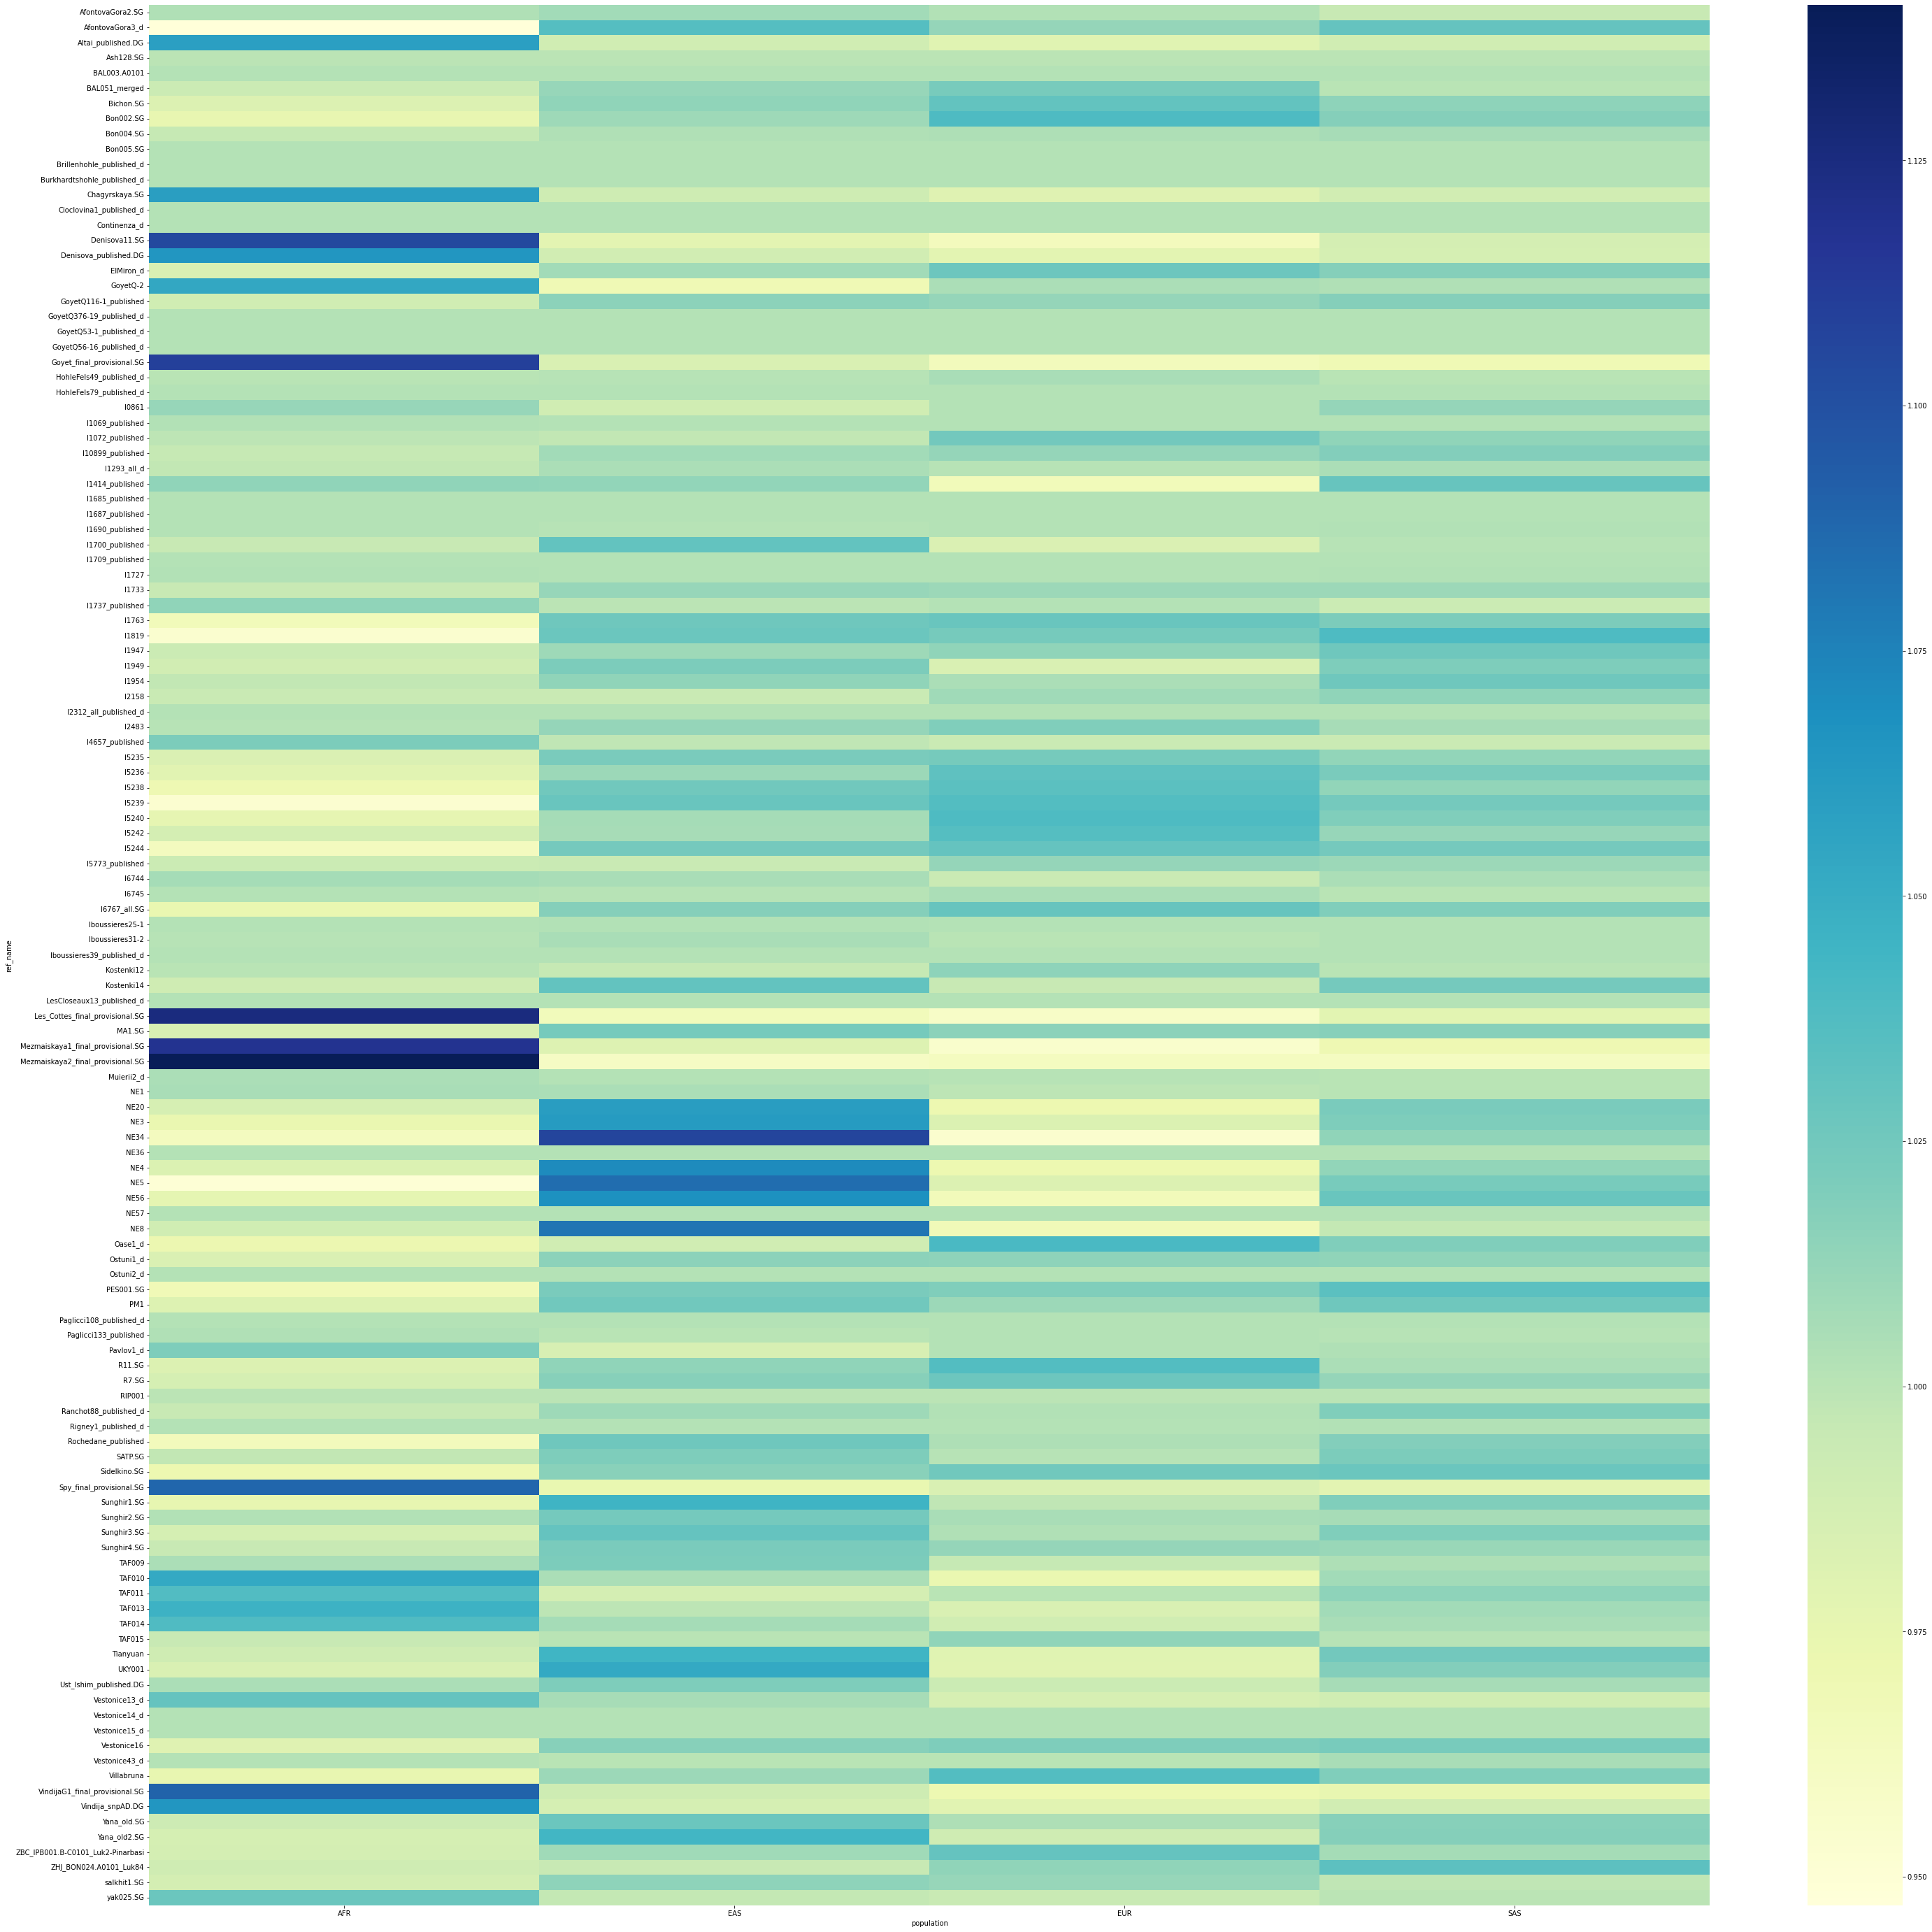

In [ ]:
#above, flipped
#heatmap of the normalized dmers, flipped to be horizontal, organized by ancestry
fig, ax = plt.subplots(figsize=(50, 50))
ax = sns.heatmap(flipped_normalized_dmers_cov, cmap="YlGnBu")
ax.set_yticklabels(flipped_normalized_dmers_cov.index)
ax.set_xticklabels(flipped_normalized_dmers_cov.columns)


KeyError: 'sample_name'

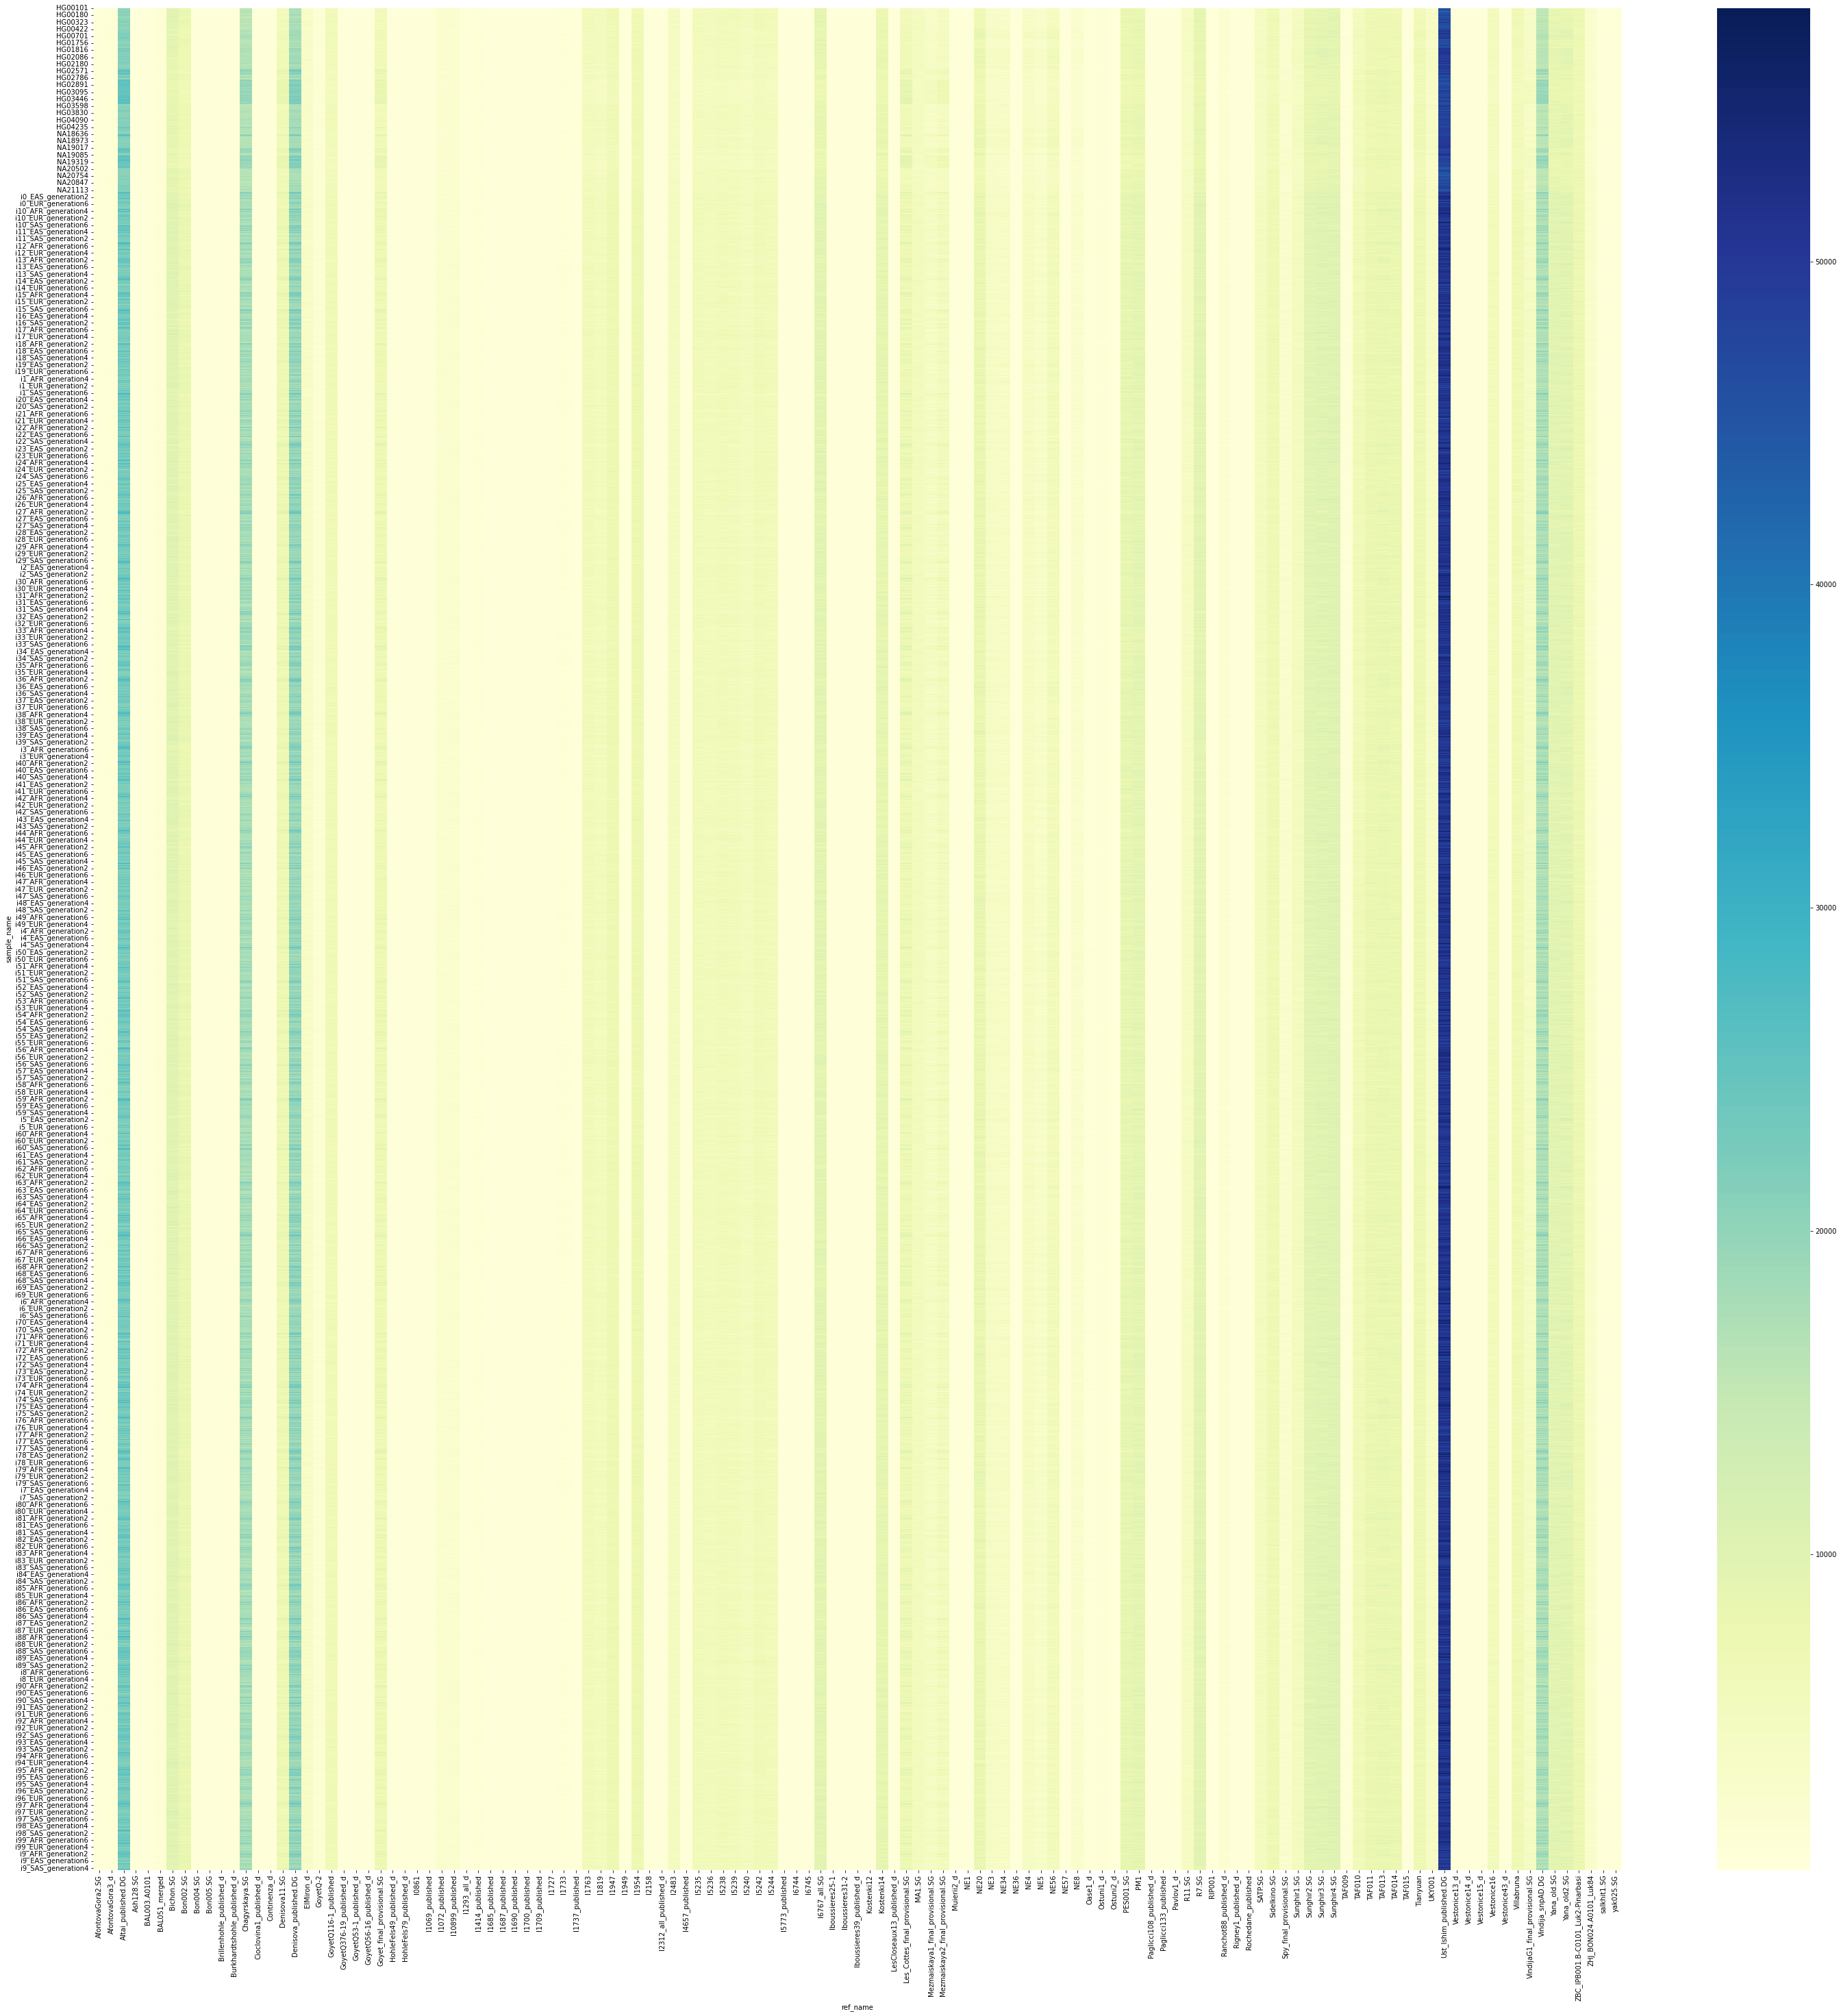

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# xticklabels = cov["ref_name"].unque().tolist()
# yticklabels = cov["sample_name"].unique().tolist()
fig, ax = plt.subplots(figsize=(50, 50))
ax = sns.heatmap(cov, cmap="YlGnBu")
ax.set_yticklabels(cov['sample_name'].unique().tolist())
ax.set_xticklabels(cov['ref_name'].unque().tolist())
# xticklabels = cov['ref_name'].unque().tolist(), yticklabels = cov['sample_name'].unique().tolist(), square = True)
#ay=sns.heatmap(cov)

ValueError: The number of FixedLocator locations (267), usually from a call to set_ticks, does not match the number of ticklabels (2663).

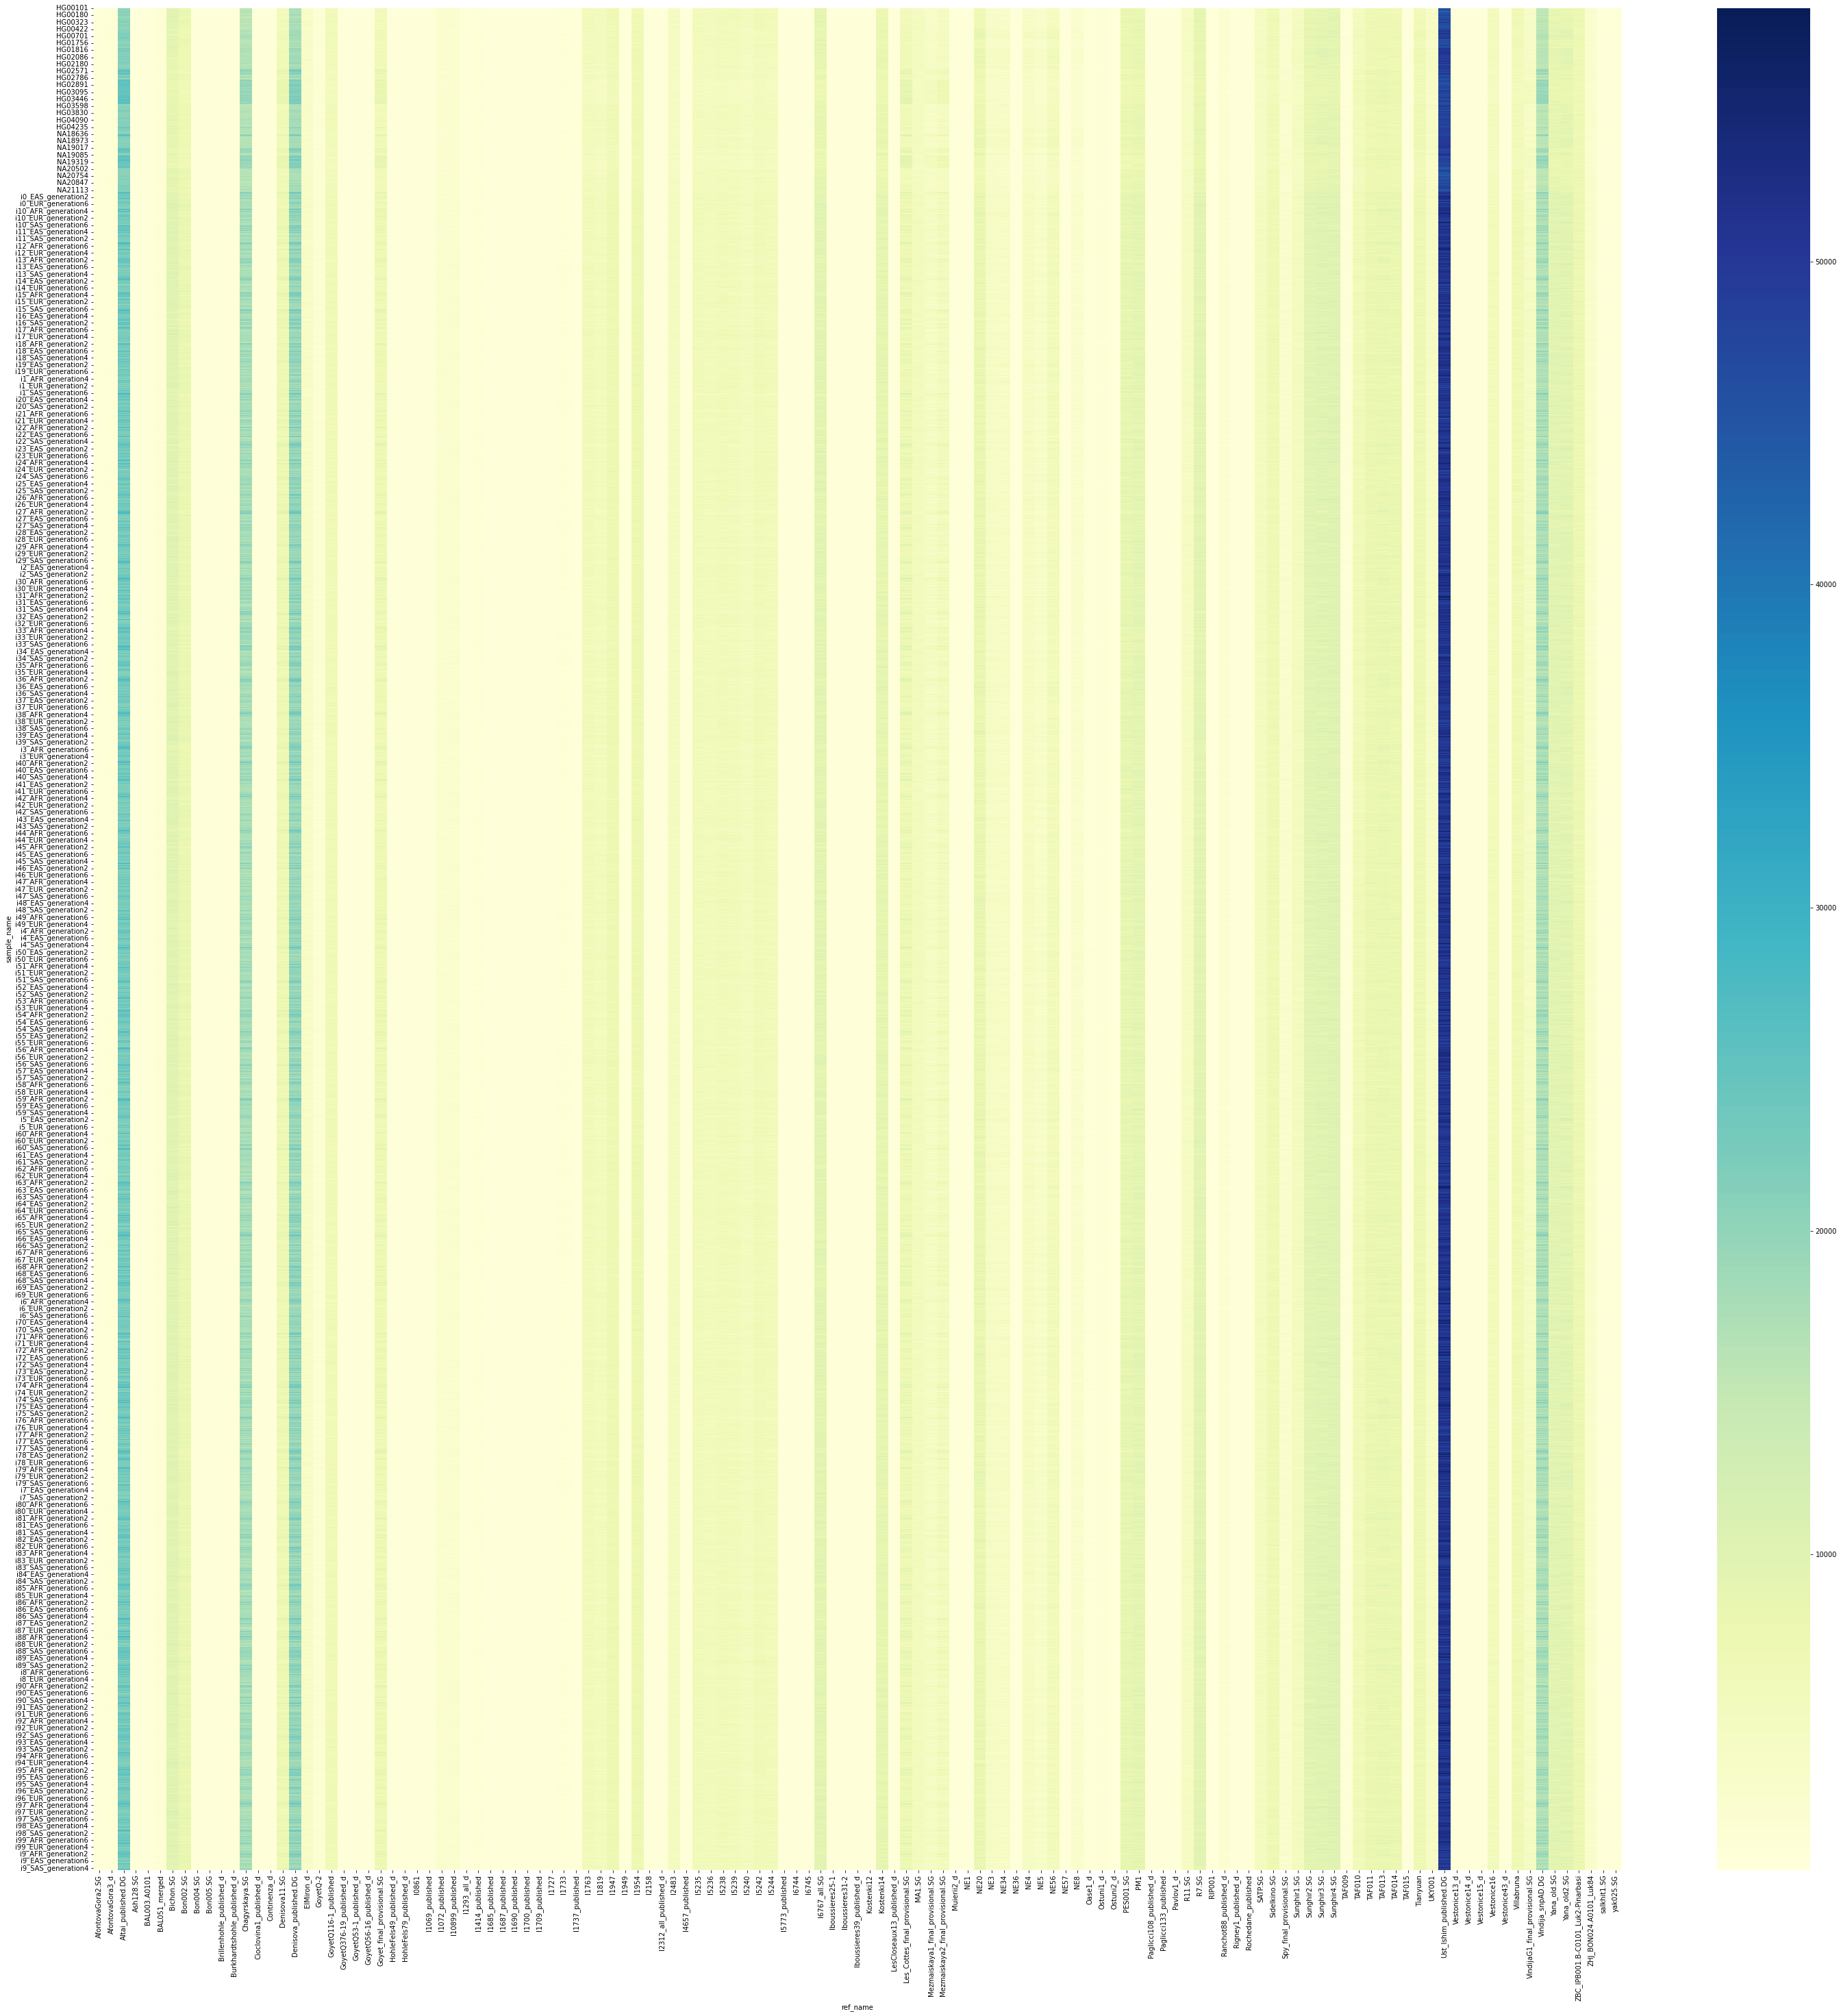

In [ ]:

fig, ax = plt.subplots(figsize=(50, 50))
ax = sns.heatmap(cov, cmap="YlGnBu")
ax.set_yticklabels(cov.index)
ax.set_xticklabels(cov.columns)


[Text(0.5, 0, 'AfontovaGora2.SG'),
 Text(1.5, 0, 'AfontovaGora3_d'),
 Text(2.5, 0, 'Altai_published.DG'),
 Text(3.5, 0, 'Ash128.SG'),
 Text(4.5, 0, 'BAL003.A0101'),
 Text(5.5, 0, 'BAL051_merged'),
 Text(6.5, 0, 'Bichon.SG'),
 Text(7.5, 0, 'Bon002.SG'),
 Text(8.5, 0, 'Bon004.SG'),
 Text(9.5, 0, 'Bon005.SG'),
 Text(10.5, 0, 'Brillenhohle_published_d'),
 Text(11.5, 0, 'Burkhardtshohle_published_d'),
 Text(12.5, 0, 'Chagyrskaya.SG'),
 Text(13.5, 0, 'Cioclovina1_published_d'),
 Text(14.5, 0, 'Continenza_d'),
 Text(15.5, 0, 'Denisova11.SG'),
 Text(16.5, 0, 'Denisova_published.DG'),
 Text(17.5, 0, 'ElMiron_d'),
 Text(18.5, 0, 'GoyetQ-2'),
 Text(19.5, 0, 'GoyetQ116-1_published'),
 Text(20.5, 0, 'GoyetQ376-19_published_d'),
 Text(21.5, 0, 'GoyetQ53-1_published_d'),
 Text(22.5, 0, 'GoyetQ56-16_published_d'),
 Text(23.5, 0, 'Goyet_final_provisional.SG'),
 Text(24.5, 0, 'HohleFels49_published_d'),
 Text(25.5, 0, 'HohleFels79_published_d'),
 Text(26.5, 0, 'I0861'),
 Text(27.5, 0, 'I1069_published')

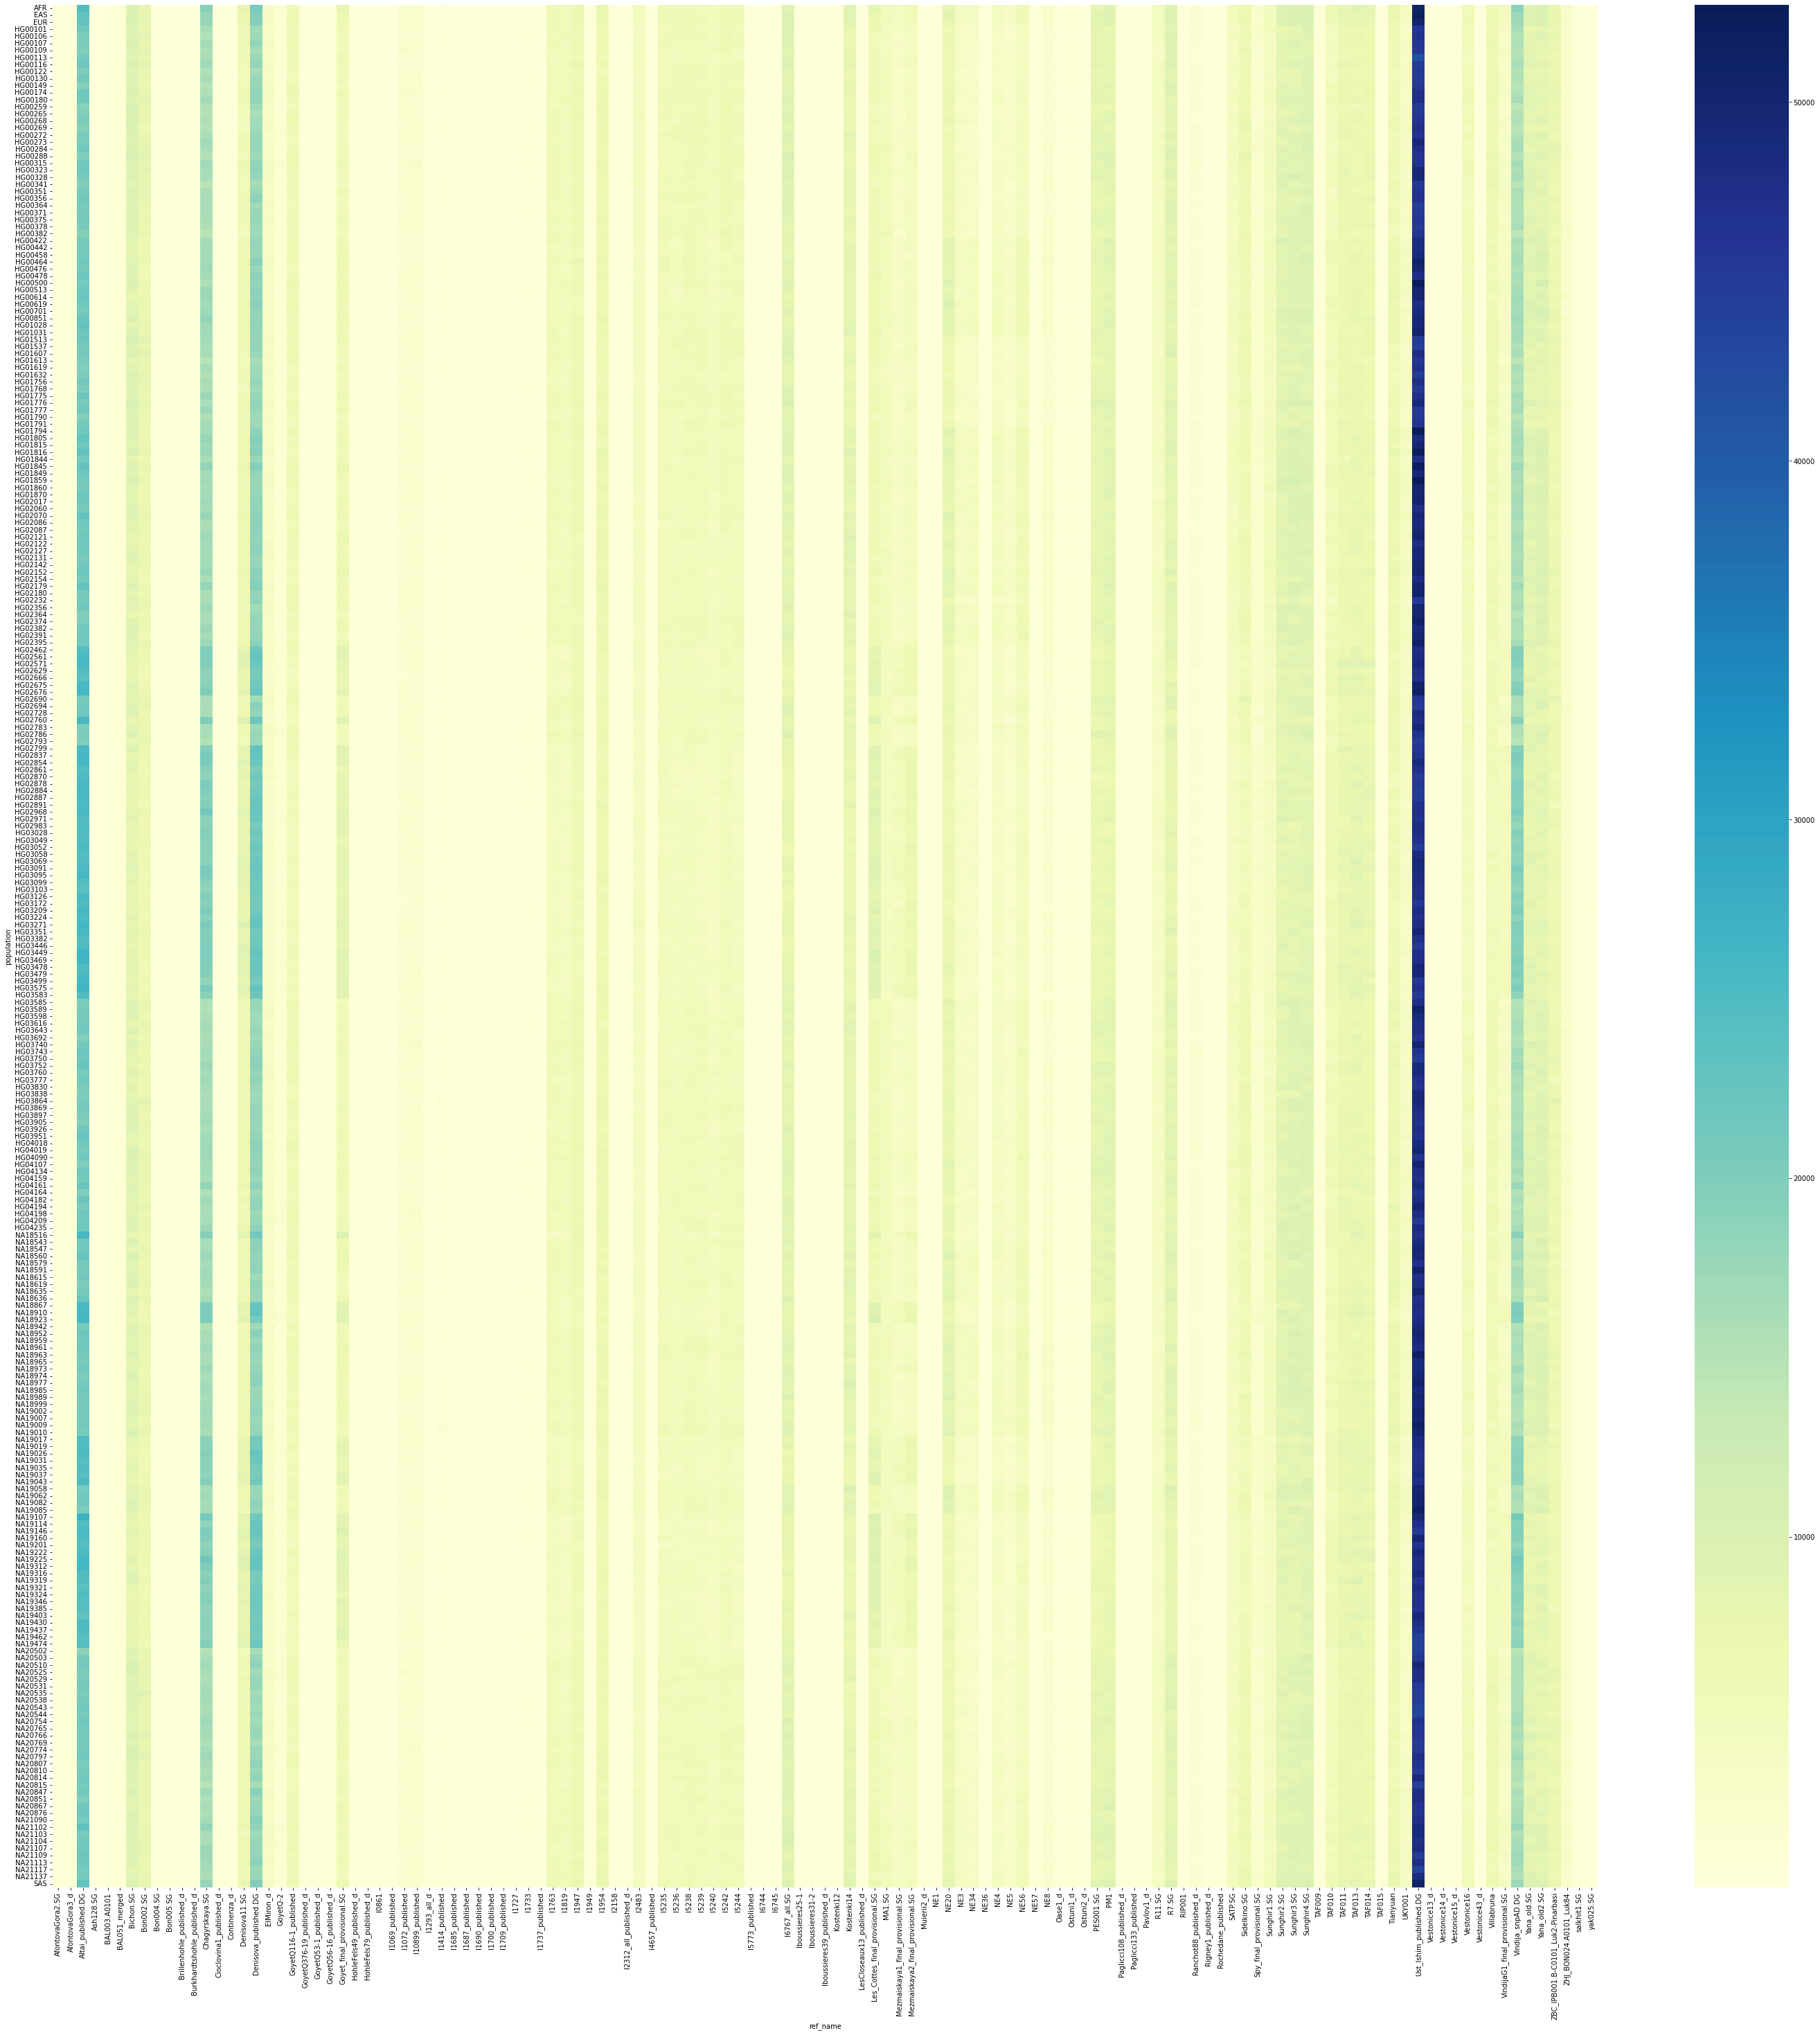

In [ ]:
fig, ax = plt.subplots(figsize=(50, 50))
ax = sns.heatmap(cov_pop_sort, cmap="YlGnBu")
ax.set_yticklabels(cov_pop_sort.index)
ax.set_xticklabels(cov_pop_sort.columns)


KeyboardInterrupt: 

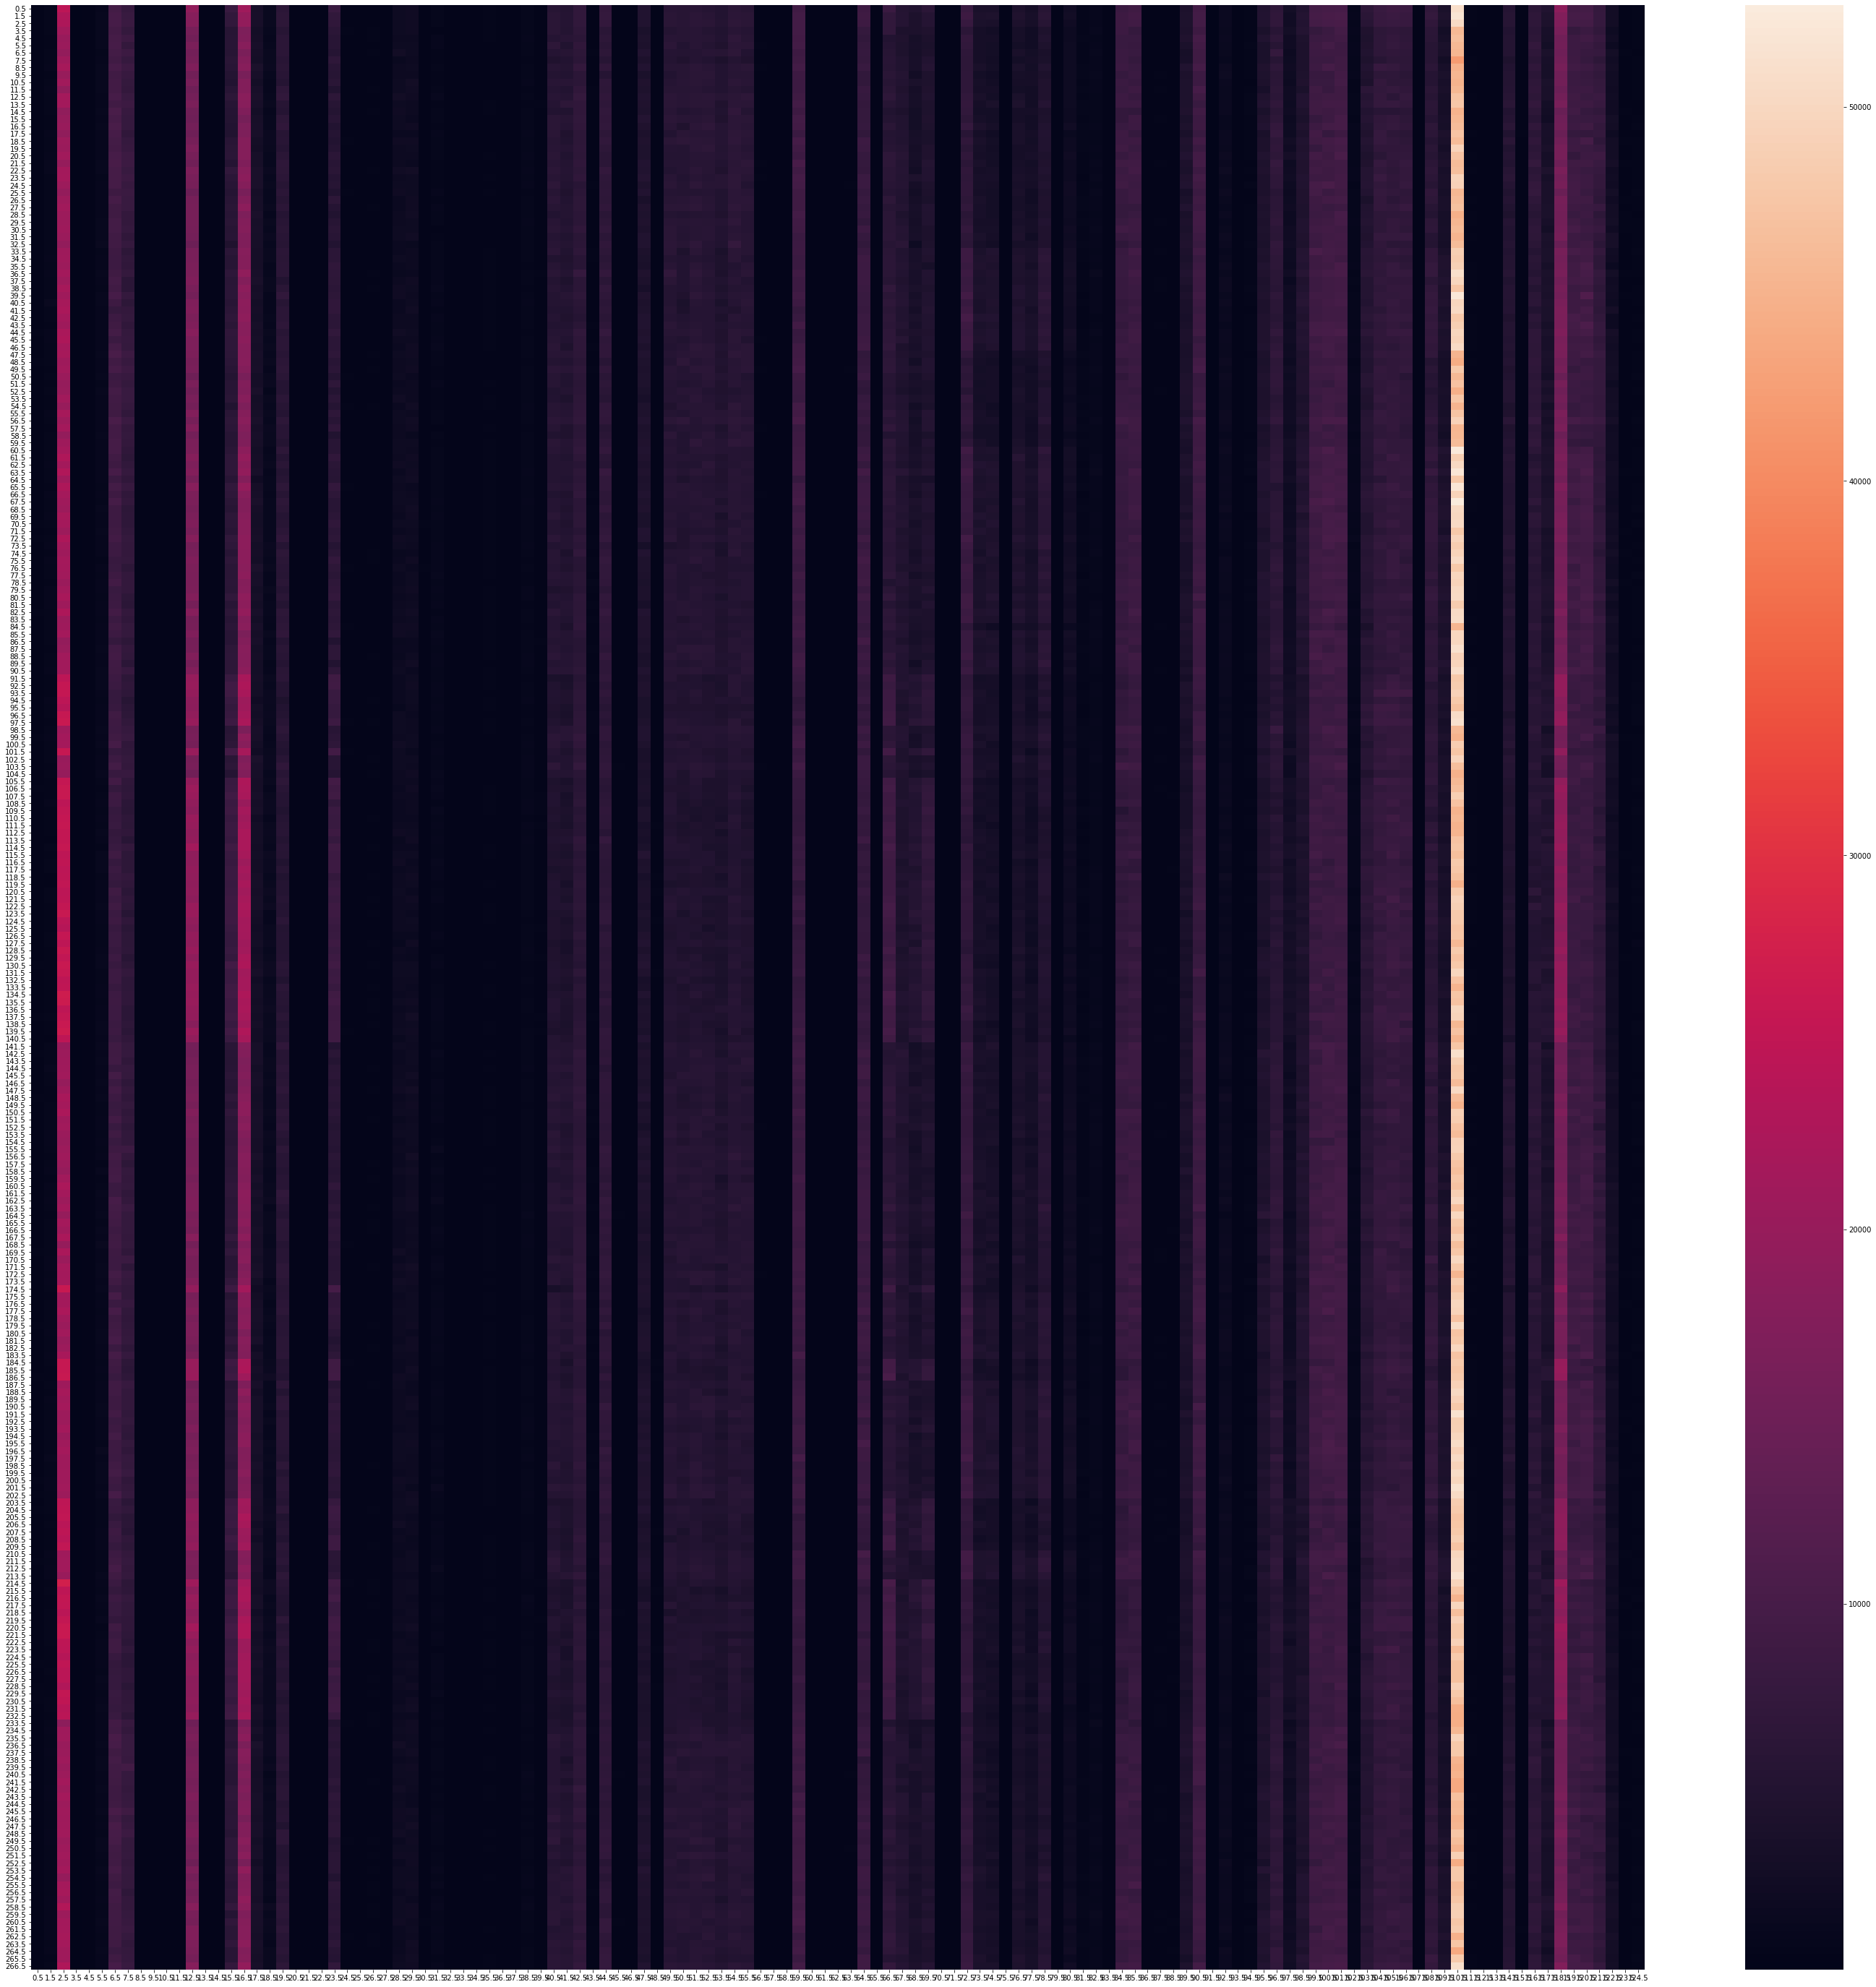

In [ ]:
fig, ax = plt.subplots(figsize=(50, 50))
ax = sns.heatmap(cov_pop_sort)
ax.set_yticklabels(cov_pop_sort.index)
ax.set_xticklabels(cov_pop_sort.columns)


[Text(0.5, 0, 'AfontovaGora2.SG'),
 Text(1.5, 0, 'AfontovaGora3_d'),
 Text(2.5, 0, 'Altai_published.DG'),
 Text(3.5, 0, 'Ash128.SG'),
 Text(4.5, 0, 'BAL003.A0101'),
 Text(5.5, 0, 'BAL051_merged'),
 Text(6.5, 0, 'Bichon.SG'),
 Text(7.5, 0, 'Bon002.SG'),
 Text(8.5, 0, 'Bon004.SG'),
 Text(9.5, 0, 'Bon005.SG'),
 Text(10.5, 0, 'Brillenhohle_published_d'),
 Text(11.5, 0, 'Burkhardtshohle_published_d'),
 Text(12.5, 0, 'Chagyrskaya.SG'),
 Text(13.5, 0, 'Cioclovina1_published_d'),
 Text(14.5, 0, 'Continenza_d'),
 Text(15.5, 0, 'Denisova11.SG'),
 Text(16.5, 0, 'Denisova_published.DG'),
 Text(17.5, 0, 'ElMiron_d'),
 Text(18.5, 0, 'GoyetQ-2'),
 Text(19.5, 0, 'GoyetQ116-1_published'),
 Text(20.5, 0, 'GoyetQ376-19_published_d'),
 Text(21.5, 0, 'GoyetQ53-1_published_d'),
 Text(22.5, 0, 'GoyetQ56-16_published_d'),
 Text(23.5, 0, 'Goyet_final_provisional.SG'),
 Text(24.5, 0, 'HohleFels49_published_d'),
 Text(25.5, 0, 'HohleFels79_published_d'),
 Text(26.5, 0, 'I0861'),
 Text(27.5, 0, 'I1069_published')

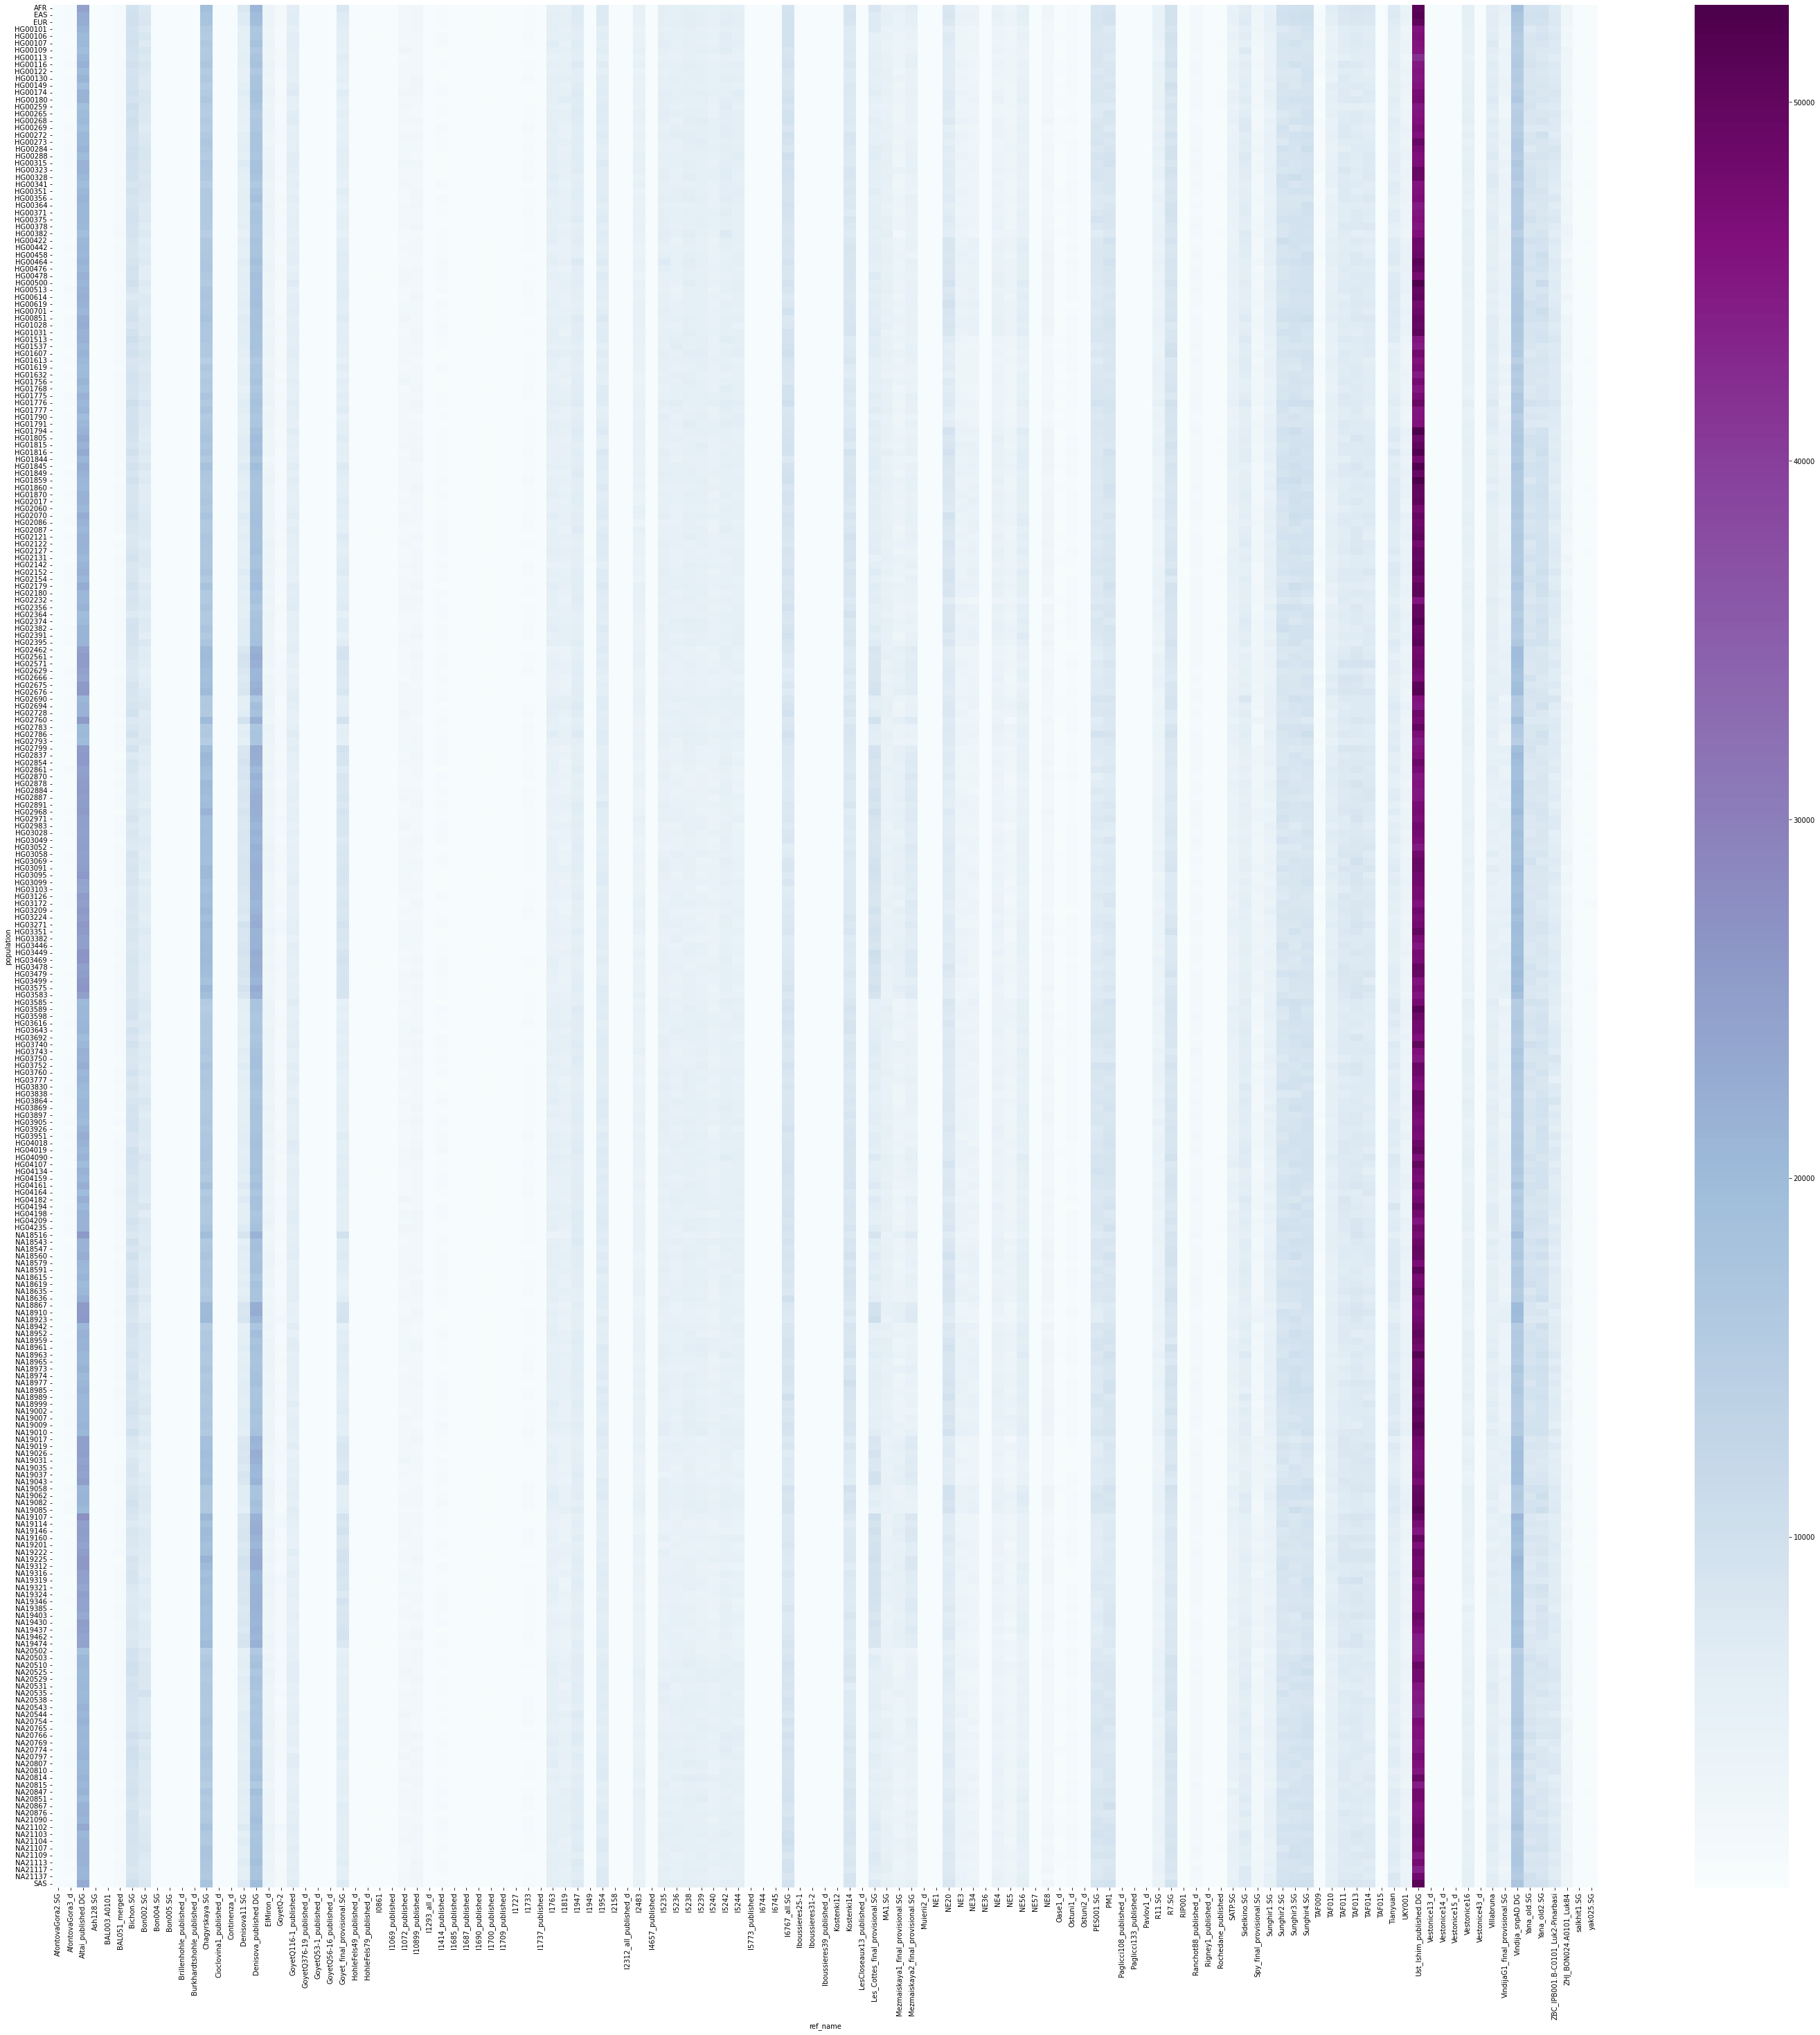

In [ ]:
fig, ax = plt.subplots(figsize=(50, 50))
ax = sns.heatmap(cov_pop_sort, cmap="BuPu")
ax.set_yticklabels(cov_pop_sort.index)
ax.set_xticklabels(cov_pop_sort.columns)


ValueError: The number of FixedLocator locations (134), usually from a call to set_ticks, does not match the number of ticklabels (267).

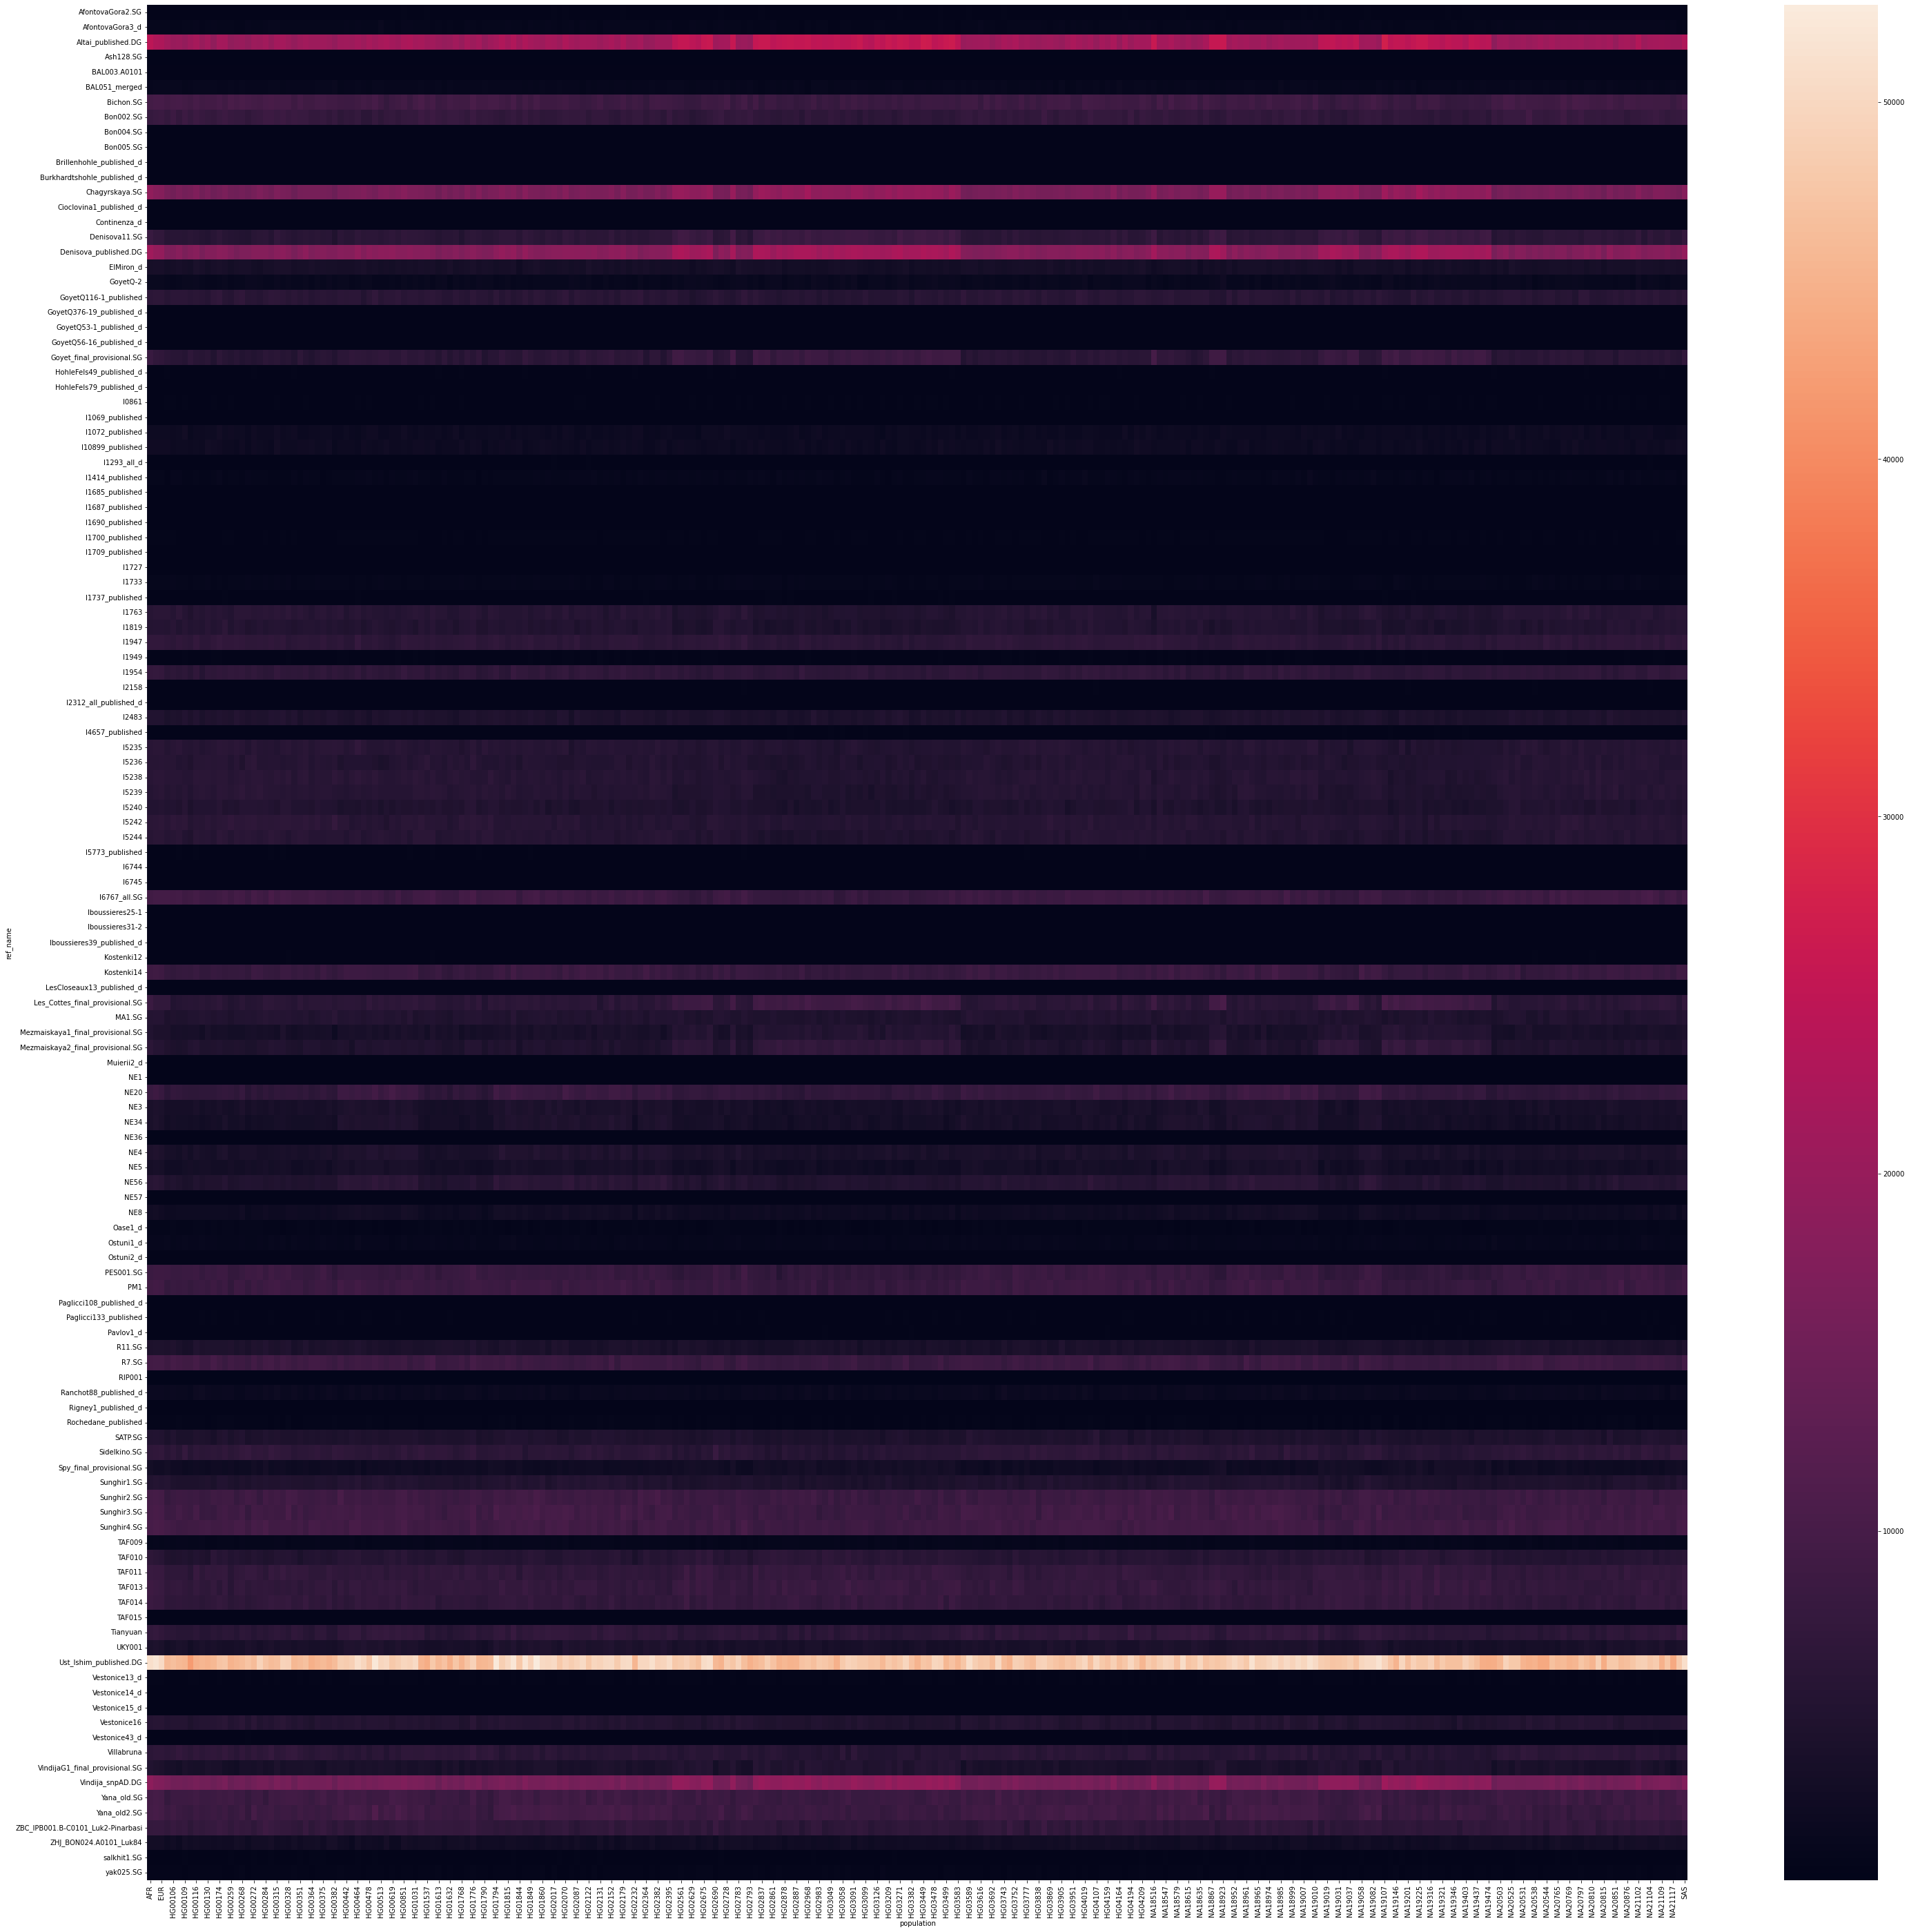

In [ ]:
fig, ax = plt.subplots(figsize=(50, 50))
ax = sns.heatmap(flip_cov_pop_sort)
ax.set_yticklabels(flip_cov_pop_sort.index)
ax.set_xticklabels(flip_cov_pop_sort.columns)


In [ ]:
dropcol = ['AfontovaGora2.SG', 'AfontovaGora3_d', 'Ash128.SG', 'BAL003.A0101', 'BAL051_merged', 
            'Bon004.SG', 'Bon005.SG','Brillenhohle_published_d', 'Burkhardtshohle_published_d',
            'Cioclovina1_published_d', 'Continenza_d', 'ElMiron_d', 'GoyetQ-2', 
            'GoyetQ376-19_published_d','GoyetQ53-1_published_d','GoyetQ56-16_published_d',
            'HohleFels49_published_d', 'HohleFels79_published_d', 'I0861', 'I1069_published', 
            'I1072_published', 'I10899_published', 'I1293_all_d', 'I1414_published', 'I1685_published',
            'I1687_published','I1690_published', 'I1700_published','I1709_published', 'I1727', 
            'I1733', 'I1737_published', 'I1763','I1819', 'I1947', 'I1949', 'I1954', 'I2158', 
            'I2312_all_published_d','I2483', 'I4657_published', 'I5235', 'I5236', 'I5238', 
            'I5239', 'I5240', 'I5242', 'I5244', 'I5773_published', 'I6744', 'I6745', 'Iboussieres25-1',
            'Iboussieres31-2', 'Iboussieres39_published_d', 'Kostenki12','LesCloseaux13_published_d',
            'MA1.SG', 'Mezmaiskaya1_final_provisional.SG', 'Muierii2_d', 'NE1', 'NE3', 'NE34', 'NE36',
            'NE4', 'NE5', 'NE57', 'NE8', 'Oase1_d', 'Ostuni1_d', 'Paglicci108_published_d', 
            'Paglicci133_published', 'Pavlov1_d', 'R11.SG', 'RIP001','Ranchot88_published_d',
            'Rigney1_published_d', 'Rochedane_published', 'SATP.SG','Sidelkino.SG', 
            'Spy_final_provisional.SG', 'Sunghir1.SG', 'TAF009', 'TAF010', 'TAF011', 'TAF013',
            'TAF014', 'TAF015', 'Tianyuan', 'UKY001', 'Vestonice13_d','Vestonice14_d', 
            'Vestonice15_d', 'Vestonice16', 'Vestonice43_d', 'Villabruna', 'VindijaG1_final_provisional.SG',
            'ZBC_IPB001.B-C0101_Luk2-Pinarbasi','ZHJ_BON024.A0101_Luk84', 'salkhit1.SG', 'yak025.SG']
selected_aDNA=cov.drop(dropcol, axis=1)

In [ ]:
selected_aDNA

ref_name            Altai_published.DG  Bichon.SG  Bon002.SG  Chagyrskaya.SG  \
sample_name                                                                    
HG00101                        21159.0     9322.5     7449.5         16065.5   
HG00106                        20219.5     9760.5     8607.5         15477.0   
HG00107                        20481.5     9902.0     7256.5         16453.0   
HG00109                        19604.0     9565.5     8519.5         15731.0   
HG00113                        20806.0     9143.5     7768.5         16134.5   
...                                ...        ...        ...             ...   
i9_SAS_generation2             21223.0     9455.0     8389.0         16514.0   
i9_SAS_generation3             21518.0     8998.0     8332.0         17213.5   
i9_SAS_generation4             25277.0     8896.5     7829.5         19717.0   
i9_SAS_generation5             21341.0    10344.0     7879.0         16442.0   
i9_SAS_generation6             27692.5     9668.5     7309.0         20123.0   

ref_name            Denisova11.SG  Denisova_published.DG  \
sample_name                                                
HG00101                    5577.0                17036.5   
HG00106                    5840.5                17122.0   
HG00107                    5777.5                18173.0   
HG00109                    5670.0                16491.5   
HG00113                    6022.5                17551.0   
...                           ...                    ...   
i9_SAS_generation2         6515.0                18185.0   
i9_SAS_generation3         6806.5                18363.0   
i9_SAS_generation4         9758.5                22142.0   
i9_SAS_generation5         6582.0                19163.5   
i9_SAS_generation6         9290.0                22761.5   

ref_name            GoyetQ116-1_published  Goyet_final_provisional.SG  \
sample_name                                                             
HG00101                            5711.0                      6267.5   
HG00106                            6242.0                      5791.5   
HG00107                            6294.0                      5859.5   
HG00109                            6234.0                      5380.0   
HG00113                            5945.5                      6630.0   
...                                   ...                         ...   
i9_SAS_generation2                 6362.5                      6289.0   
i9_SAS_generation3                 6801.5                      6040.0   
i9_SAS_generation4                 4822.0                      8868.5   
i9_SAS_generation5                 6493.5                      6161.0   
i9_SAS_generation6                 6549.0                      9522.0   

ref_name            I6767_all.SG  Kostenki14  ...  PES001.SG     PM1   R7.SG  \
sample_name                                   ...                              
HG00101                   9482.0      7411.0  ...     8511.5  7476.5  8790.0   
HG00106                   9335.5      7053.5  ...     8161.0  8209.0  9672.0   
HG00107                   9565.5      7555.5  ...     8132.5  7895.5  9381.0   
HG00109                   8688.0      7726.5  ...     8368.5  8095.5  8881.5   
HG00113                   8850.0      7463.5  ...     8244.5  7502.5  8880.5   
...                          ...         ...  ...        ...     ...     ...   
i9_SAS_generation2        8934.0      9175.0  ...     8828.0  9626.5  8332.0   
i9_SAS_generation3        9348.5      9634.0  ...     9108.5  9579.5  9539.5   
i9_SAS_generation4        9577.5      8172.0  ...     7921.0  8259.5  8384.5   
i9_SAS_generation5        9857.0      8159.0  ...     8698.5  9118.0  9049.5   
i9_SAS_generation6        8137.5      8548.0  ...     8588.5  8198.0  8763.5   

ref_name            Sunghir2.SG  Sunghir3.SG  Sunghir4.SG  \
sample_name                                                 
HG00101                  7550.0       8260.0       9595.5   
HG00

In [ ]:
aDNA_anno=pd.read_csv("~/reich_files/v50.0_1240K_public.anno", sep="\t")
kept_aDNA=selected_aDNA.columns

In [ ]:
kept_aDNA

Index(['Altai_published.DG', 'Bichon.SG', 'Bon002.SG', 'Chagyrskaya.SG',
       'Denisova11.SG', 'Denisova_published.DG', 'GoyetQ116-1_published',
       'Goyet_final_provisional.SG', 'I6767_all.SG', 'Kostenki14',
       'Les_Cottes_final_provisional.SG', 'Mezmaiskaya2_final_provisional.SG',
       'NE20', 'NE56', 'Ostuni2_d', 'PES001.SG', 'PM1', 'R7.SG', 'Sunghir2.SG',
       'Sunghir3.SG', 'Sunghir4.SG', 'Ust_Ishim_published.DG',
       'Vindija_snpAD.DG', 'Yana_old.SG', 'Yana_old2.SG'],
      dtype='object', name='ref_name')

In [ ]:
aDNA_anno.columns
remcolumns = ['Master ID','Index', 'Skeletal code', 'Skeletal element',
              'Year data from this individual was first published [for a present-day individuals we give the data of the data reported here; missing: GreenScience 2010 (Vi33.15, Vi33.26), Olalde2018 (I2657), RasmussenNature2010 (Australian)]',
              'Publication','Method for Determining Date; unless otherwise specified, calibrations use 95.4% intervals from OxCal v4.4.2 Bronk Ramsey (2009); r:5; Atmospheric data from Reimer et al (2020)',
              'Date standard deviation in BP [OxCal sigma for a direct radiocarbon date, and standard deviation of the uniform disribution between the two bounds for a contextual date]',
              'Full Date: One of two formats. (Format 1) 95.4% CI calibrated radiocarbon age (Conventional Radiocarbon Age BP, Lab number) e.g. 2624-2350 calBCE (3990±40 BP, Ua-35016). (Format 2) Archaeological context range, e.g. 2500-1700 BCE',
              'Age at Death Estimate', 'Data source', 'No. Libraries', 'SNPs hit on autosomal targets', 'Family ID and position within family',
              'Y haplogroup  in ISOGG v15.73 notation (automatically called)',
              'Y haplogroup (manual curation in terminal mutation format)',
              'Y haplogroup (manual curation in ISOGG format)',
              'mtDNA coverage (merged data)', 'mtDNA haplogroup if ≥2 or published',
              'mtDNA match to consensus if ≥2 coverage (merged data)', 'Damage rate in first nucleotide on sequences overlapping 1240k targets (merged data)',
              'Sex ratio [Y/(Y+X) counts] (merged data)', 'Skeletal code', 'Skeletal element',
              'Xcontam ANGSD SNPs (only if male)',
              'Xcontam ANGSD MOM point estimate (only if male and ≥200)', 'Mean length of shotgun sequences (merged data)',
              'Xcontam ANGSD MOM Z-score (only if male and ≥200)',
              'Xcontam ANGSD MOM 95% CI truncated at 0 (only if male and ≥200)', 'Library type (minus=no.damage.correction, half=damage.retained.at.last.position, plus=damage.fully.corrected, ds=double.stranded.library.preparation, ss=single.stranded.library.preparation)',
              'LibraryID(s)', 'ASSESSMENT', 
              'ASSESSMENT REASONING (Xcontam interval is listed if lower bound is >0.005, "QUESTIONABLE" if lower bound is 0.01-0.02, "QUESTIONABLE_CRITICAL" or "FAIL" if lower bound is >0.02) (mtcontam confidence interval is listed if coverage >2 and upper bound is <0.98: 0.9-0.95 is "QUESTIONABLE"; <0.9 is "QUESTIONABLE_CRITICAL", questionable status gets overriden by ANGSD with PASS if upper bound of contamination is <0.01 and QUESTIONABLE if upper bound is 0.01-0.05) (damage for ds.half is "QUESTIONABLE_CRITICAL/FAIL" if <0.01, and recorded but passed if 0.01-0.03; libraries with untreated last base are "QUESTIONABLE_CRITICAL" or "FAIL" if <0.01, "QUESTIONABLE" if 0.01-0.03, and recorded but passed if 0.03-0.1) (sexratio is QUESTIONABLE if [0.03,0.10] or [0.30,0.35); QUESTIONABLE_CRITICAL/FAIL if (0.10,0.30))']
aDNA_anno_cleaned=aDNA_anno.drop(remcolumns, axis=1)

In [ ]:
aDNA_anno_cleaned


Version ID  \
0                I0626_all   
1                I0627_all   
2      I1137_all_published   
3                I1859_all   
4                I2497_all   
...                    ...   
10386    I15962.v50.0_d.SG   
10387    I15968.v50.0_d.SG   
10388    I20527.v50.0_d.SG   
10389    I10871.v50.0_d.SG   
10390    I11974.v50.0_d.SG   

       Date mean in BP in years before 1950 CE [OxCal mu for a direct radiocarbon date, and average of range for a contextual date]  \
0                                                   3850                                                                              
1                                                   3949                                                                              
2                                                   3758                                                                              
3                                                   3762                                                                              
4                                                   1950                                                                              
...                                                  ...                                                                              
10386                                                517                                                                              
10387                                                930                                                                              
10388                                                998                                                                              
10389                                               7913                                                                              
10390                                              11885                                                                              

                                   Group ID                         Locality  \
0                             Vietnam_N_all                          Man Bac   
1                             Vietnam_N_all                          Man Bac   
2                   Vietnam_N_all_published                          Man Bac   
3                             Vietnam_N_all                          Man Bac   
4                            Vietnam_BA_all                          Nui Nap   
...                                     ...                              ...   
10386         Dominican_LaCaleta_Ceramic.SG                        La Caleta   
10387         Dominican_LaCaleta_Ceramic.SG                        La Caleta   
10388           Dominican_ElSoco_Ceramic.SG                          El Soco   
10389                    Cameroon_SMA.DG.SG                        Shum Laka   
10390  Chile_LosRieles_12000BP_published.SG  Coquimbo, Los Vilos, Los Rieles   

                  Country         Lat.        Long.  \
0                 Vietnam  20.13333333  105.9833333   
1                 Vietnam  20.13333333  105.9833333   
2                 Vietnam  20.13333333  105.9833333   
3                 Vietnam  20.13333333  105.9833333   
4                 Vietnam         19.8        105.8   
...                   ...          ...          ...   
10386  Dominican Republic       18.451      -69.686   
10387  Dominican Republic       18.451      -69.686   
10388  Dominican Republic       18.447      -69.187   
10389            Cameroon       5.8586      10.0778   
10390               Chile       -31.92        -71.5   

      Coverage on autosomal targets Sex contamLD est contamLD s.e.  \
0                           0.05292   M        0.068         0.027   
1                          0.125518   F       -0.033         0.025   
2                          0.136147   M        0.027         0.026   
3                          0.061191   F        0.025         0.042   
4                          0.935166   F       -0.031         0

In [ ]:
selected_aDNA_anno=aDNA_anno_cleaned[aDNA_anno['Version ID'].isin(kept_aDNA)]
for_frankengenomes=aDNA_anno_cleaned[aDNA_anno['Version ID'].isin(dropcol)]

In [ ]:
selected_aDNA_anno.sort_values('Country')

Version ID  \
620                GoyetQ116-1_published   
7440          Goyet_final_provisional.SG   
10342                               NE20   
10343                               NE56   
547                     Vindija_snpAD.DG   
7441     Les_Cottes_final_provisional.SG   
8058                               R7.SG   
1150                           Ostuni2_d   
10367                                PM1   
10032                          PES001.SG   
7699                        Yana_old2.SG   
7698                         Yana_old.SG   
7446                      Chagyrskaya.SG   
7443   Mezmaiskaya2_final_provisional.SG   
7034                       Denisova11.SG   
4872                         Sunghir3.SG   
4871                         Sunghir2.SG   
1144                          Kostenki14   
552               Ust_Ishim_published.DG   
549                Denisova_published.DG   
548                   Altai_published.DG   
4873                         Sunghir4.SG   
1217                           Bichon.SG   
189                            Bon002.SG   
8108                        I6767_all.SG   

       Date mean in BP in years before 1950 CE [OxCal mu for a direct radiocarbon date, and average of range for a contextual date]  \
620                                                35208                                                                              
7440                                               42436                                                                              
10342                                              33592                                                                              
10343                                              19427                                                                              
547                                                50000                                                                              
7441                                               42846                                                                              
8058                                               10706                                                                              
1150                                               29116                                                                              
10367                                              34415                                                                              
10032                                              12711                                                                              
7699                                               31850                                                                              
7698                                               31850                                                                              
7446                                               80000                                                                              
7443                                               43449                                                                              
7034                                               98700                                                                              
4872                                               34517                                                                              
4871                                               34629                                                                              
1144                                               38052                                                                              
552                                                44366                                                                              
549                                                63900                                                                              
548                                               

In [ ]:
for_frankengenomes.sort_values('Country')

Version ID  \
1278                     I2483   
4865  GoyetQ376-19_published_d   
7444  Spy_final_provisional.SG   
622     GoyetQ53-1_published_d   
623    GoyetQ56-16_published_d   
...                        ...   
4238                     I1733   
1490                     I1819   
1485                     I1763   
4653                     I6745   
4652                     I6744   

      Date mean in BP in years before 1950 CE [OxCal mu for a direct radiocarbon date, and average of range for a contextual date]  \
1278                                              30850                                                                              
4865                                              27505                                                                              
7444                                              40922                                                                              
622                                               28051                                                                              
623                                               26300                                                                              
...                                                 ...                                                                              
4238                                              10200                                                                              
1490                                              10658                                                                              
1485                                              10081                                                                              
4653                                              10546                                                                              
4652                                              10393                                                                              

                                 Group ID  \
1278                     Austria_Krems1_1   
4865    Belgium_UP_GoyetQ376-19_published   
7444                   Spy_Neanderthal.SG   
622    Belgium_UP_GoyetQ53_1_published_lc   
623   Belgium_UP_GoyetQ56_16_published_lc   
...                                   ...   
4238                   Ukraine_Mesolithic   
1490                   Ukraine_Mesolithic   
1485                   Ukraine_Mesolithic   
4653                   England_Mesolithic   
4652                England_Mesolithic_o1   

                                               Locality         Country  \
1278                                    Krems-Wachtberg         Austria   
4865                    Troisieme caverne of Goyet cave         Belgium   
7444                                           Spy Cave         Belgium   
622                     Troisieme caverne of Goyet cave         Belgium   
623                     Troisieme caverne of Goyet cave         Belgium   
...                                                 ...             ...   
4238                                         Vasil'evka         Ukraine   
1490                                         Vasil'evka         Ukraine   
1485                                         Vasil'evka         Ukraine   
4653  England, Somerset, Burrington Combe, Aveline's...  United Kingdom   
4652  England, Somerset, Burrington Combe, Aveline's...  United Kingdom   

           Lat.      Long. Coverage on autosomal targets Sex contamLD est  \
1278      48.41      15.59                         1.772   M       -0.011   
4865      50.26       4.28                         0.012   F       -0.007   
7444  50.482222   4.669167                      0.663808   M            0   
622       50.26       4.28                         0.006   F       -0.007   
623       50.26       4.28                         0.005   F       -0.007   
...         ...        ...                           ...  ..          ...   
4238  47.434167  35.2

In [ ]:
for_frankengenomes['Country'].unique()

array(['Turkey', 'Italy', 'Belgium', 'France', 'Germany', 'Romania',
       'Jordan', 'Russia', 'Israel', 'Czech Republic', 'Spain', 'Georgia',
       'Austria', 'Ukraine', 'China', 'Serbia', 'United Kingdom', 'Iran',
       'Morocco', 'Croatia', 'Mongolia'], dtype=object)

In [ ]:
country = ['Mongolia']

for_frankengenomes[for_frankengenomes['Country'].isin(country)]



Version ID  \
9973  salkhit1.SG   

      Date mean in BP in years before 1950 CE [OxCal mu for a direct radiocarbon date, and average of range for a contextual date]  \
9973                                              34873                                                                              

                    Group ID  \
9973  Mongolia_Salkhit_UP.SG   

                                               Locality   Country   Lat.  \
9973  Khentii Province, Norovlin County, Salkhit Valley  Mongolia  48.27   

       Long. Coverage on autosomal targets Sex contamLD est contamLD s.e.  \
9973  112.36                      0.377372   F           ..            ..   

     contamLD warning contamLD s.e..1  
9973               ..              ..

Ash128, Bon004 and Bon005 had almost no dmer match hits, but they also have low (Ash) to very low coverage (Bon). We'll combine them together and see if that frankengenome gets anywhere. We'll call it "AB_Turkey_junk_frankengenome.vcf"

ZBC and ZHJ had dmer matches, they were just short. This will be a frankengenome too -- one more likely to give us something. We can call this one "Turkey_frankengenome.vcf"

    bcftools view -s ZBC_IPB001.B-C0101_Luk2-Pinarbasi, ZHJ_BON024.A0101_Luk84 reich_aDNA.vcf -Ov -o Turkey_frankengenome.vcf


Paglicci108_published_d, Paglicci133_published, Villabruna, Ostuni1_d, Continenza_d, I2158, R11.SG, RIP001, all had very short dmer matches and roughly the same length for all samples. We'll stitch this together into a 'junk_Italy_frankengenome.vcf' which will hopefully return something a bit better.

    bcftools view -s Paglicci108_published_d,Paglicci133_published,Villabruna,Ostuni1_d,Continenza_d,I2158,R11.SG,RIP001 reich_aDNA.vcf -Ov -o junk_Italy_frankengenome.vcf

GoyetQ53-1_published_d,GoyetQ56-16_published_d,GoyetQ376-19_published_d,GoyetQ-2,Spy_final_provisional.SG all had very short dmer matches with no apparent pattern between ancestries. We'll stitch this together into a 'junk_Belgium_frankgengenome.vcf'.

    bcftools view -s GoyetQ53-1_published_d,GoyetQ56-16_published_d,GoyetQ376-19_published_d,GoyetQ-2,Spy_final_provisional.SG  reich_aDNA.vcf -Ov -o junk_Belgium_frankengenome.vcf

Rigney1_published_d,Rochedane_published,Iboussieres39_published_d,Iboussieres25-1,Iboussieres31-2,LesCloseaux13_published_d,Ranchot88_published_d all had short dmers, no apparent pattern. 

    bcftools view -s Rigney1_published_d,Rochedane_published,Iboussieres39_published_d,Iboussieres25-1,Iboussieres31-2,LesCloseaux13_published_d,Ranchot88_published_d reich_aDNA.vcf -Ov -o junk_France_frankengenome.vcf

Burkhardtshohle_published_d,HohleFels79_published_d,Brillenhohle_published_d,HohleFels49_published_d mostly short dmers, with very little change between ancestry designations. 

    bcftools view -s Burkhardtshohle_published_d,HohleFels79_published_d,Brillenhohle_published_d,HohleFels49_published_d reich_aDNA.vcf -Ov -o junk_Germany_frankengenome.vcf

    bcftools view -s Oase1_d,Muierii2_d,Cioclovina1_published_d reich_aDNA.vcf -Ov -o junk_Romania_frankengenome.vcf

    bcftools view -s I1709_published,I1727,I1414_published,I1700_published reich_aDNA.vcf -Ov -o junk_Jordan_frankengenome.vcf

    bcftools view -s MA1.SG,AfontovaGora2.SG,Kostenki12,AfontovaGora3_d,Sunghir1.SG,Sidelkino.SG,Mezmaiskaya1_final_provisional.SG,UKY001,yak025.SG reich_aDNA.vcf -Ov -o junk_Russia_frankengenome.vcf

MA1 and Kostenki have some banding >1000 length dmers
AfontovaGora2 and 3 have some changes in length but all dmers <10000 in length so the banding is difficult to see in the heatmap
Sunghir1 has some pattern -- but low coverage results in weaker pattern than Sunghir 2-4

I0861,I1072_published,I1069_published,I1685_published,I1687_published,I1690_published all have very short dmers with some small variability -- low coverage makes this difficult to determine; the stitched genome may be better overall and may result in some more meaningful dmers and a pattern arising from them

    bcftools view -s I0861,I1072_published,I1069_published,I1685_published,I1687_published,I1690_published reich_aDNA.vcf -Ov -o junk_Israel_frankengenome.vcf

Vestonice16,Pavlov1_d,Vestonice13_d,Vestonice15_d,Vestonice43_d,Vestonice14_d -- not really any patterns that jump out but the admixed individuals might be throwing it off

    bcftools view -s Vestonice16,Pavlov1_d,Vestonice13_d,Vestonice15_d,Vestonice43_d,Vestonice14_d reich_aDNA.vcf -Ov -o junk_Czech_frankengenome.vcf

ElMiron_d,I10899_published,BAL003.A0101,BAL051_merged none of these seem like they have any particlar use but I'll merge them and label them as unsure_junk to note that

    bcftools view -s ElMiron_d,I10899_published,BAL003.A0101,BAL051_merged reich_aDNA.vcf -Ov -o unsure_junk_Spain_frankengenome.vcf

SATP.SG the one for Georgia, despite having 1.9x coverage (not terrible) has no real meaningful pattern or anything featurelike seem in the dmers. Will discard.
The same is true for Austria -- I2483	 is the only one and has no real patterns or features in the dmers

I1763,I1819,I1733,I1737_published -- some variation among ancestry and some dmers of longer/shorter lengths. I think with stitching this one may be actually useful

    bcftools view -s I1763,I1819,I1733,I1737_published reich_aDNA.vcf -Ov -o useful_Ukraine_frankengenome.vcf


The chinese samples (Tianyuan,NE34,NE5,NE1,NE8,NE57,NE36,NE3,NE4) all have decent variation across the ancestries which seems to clump by group -- I think the shorter length and low coverage is all that is stopping this from being more useful. I'll stitch these together into two different frankgenomes from the vcf. 

    bcftools view -s Tianyuan,NE34,NE5,NE1,NE8,NE57,NE36,NE3,NE4 reich_aDNA.vcf -Ov -o China_frankengenomes.vcf

I4657_published # removed because no variation
I5235,I5236,I5238,I5239,I5240,I5242,I5244, stitched to make new frankengenome:
I5773_published #removed because no variation

    bcftools view -s I5235,I5236,I5238,I5239,I5240,I5242,I5244 reich_aDNA.vcf -Ov -o Serbia_frankengenome.vcf

UK's I6744,I6745 are both junk -- little to no variation and not enough coverage to stitch together. Discarding.

I1947,I1954 have some dmers with a pattern. I1949,I1293_all_d,I2312_all_published_d have very few matches -- will keep to increase coverage where possible. 

    bcftools view -s I1947,I1954,I1949,I1293_all_d,I2312_all_published_d reich_aDNA.vcf -Ov -o Iran_frankengenome.vcf

TAF010,TAF011,TAF013,TAF014 have dmer matches (not very long, some difficulties in specific pattern, low coverage) and will be combined to generate better stitched genome. 

    bcftools view -s TAF010,TAF011,TAF013,TAF014 reich_aDNA.vcf -Ov -o Morocco_frankengenome.vcf


Croatia and Mongolia have only one genome each, and these have very low coverage and poor matching/no pattern difference by ancestry. 

Part II: frankengenomes creation from merged vcfs by area

For every frankengenome file in E3:



#For China:

    cat China_frankengenomes.vcf  | \awk -F$'\t' '{
            if (NR<34){print$0}    
            if (NR==34){print$q}
            if (NR>34) {
                for (i=1; i<10; i++){printf $i "\t"};
                for (i>9; i<NF; i++){
                    if  ($i =="1/1") {printf $i"\t"};
                    if  ($i=="1/0" ) {printf $i"\t"};
                    if  ($i=="0/1" ) {printf $i"\t"};
                    if  ($i=="0/0" ) {printf $i"\t"};
                    };
                {printf "\n"}
                }
            }'  > frankensteins.vcf

#for China we want two frankengenomes: 
#to go from the full frankenstein genomes vcf to just two 
    cat frankensteins.vcf| \
        awk -F$'\t' '{
            if (NR<34){print$0}

            if (NR>33) {
                for (i=1; i<10; i++){printf $i "\t"};
                for (i>9; i<12; i++){
                    if  ($i =="1/1") {printf $i"\t"};
                    if  ($i=="1/0" ) {printf $i"\t"};
                    if  ($i=="0/1" ) {printf $i"\t"};
                    if  ($i=="0/0" ) {printf $i"\t"};
                    if ($i=="Tianyuan"){printf $i "\t"}
                    if ($i=="NE34"){printf $i "\t"}
                    };
                {printf "\n"}
                }
            }' > frankengenome.vcf
    #get header from vcf
    cat China_into2_frankengenomes.vcf  | \
        awk -F$'\t' '{
            if (NR<34){print$0}  
            }' > header.txt

#in ipython
    ipython3
    import pandas as pd 
    df=pd.read_table("~/frankengenome.vcf", header=33, low_memory=False)
    df
    dropcol=df.columns[11:]
    df=df.drop(dropcol, axis=1)
    df.to_csv("~/E3/China_2_frankengenomes.csv", index=False, sep="\t") 
    exit()

#combine to vcf
    cat header.txt China_2_frankengenomes.csv > China_2_frankengenomes.vcf

#replace any gaps with ./.
    cat China_2_frankengenomes.vcf | awk -F$'\t' '{
    if (NR<35){print$0}
    if (NR>34){
    for (i=1; i<10; i++){printf $i "\t"};
                for (i>9; i<12; i++){
                    if  ($i =="1/1") {printf $i"\t"};
                    if  ($i=="1/0" ) {printf $i"\t"};
                    if  ($i=="0/1" ) {printf $i"\t"};
                    if  ($i=="0/0" ) {printf $i"\t"};
                    if ($i==""){printf "./.""\t"};
                    {printf "\n"}
                    }
                }
            }' > Frankengenomes/China_2_frankengenomes.vcf

#Because these do not have the 'chr' prefix in the CHROM column, add that first, before liftover:
    awk '{if($0 !~ /^#/) print "chr"$0; else print $0}' Frankengenomes/China_2_frankengenomes.vcf > Frankengenomes/China_2_genomes.vcf

    cd Frankengenomes/

#Follow this immediately with liftover:

    java -jar /mnt/efs/data/users/haley/software/picard.jar LiftoverVcf \
        I=China_2_genomes.vcf \
        O=China_2_b38.vcf.gz \
        CHAIN=/mnt/efs/resource_files/chain_files/hg19_to_hg38.chain \
        REJECT=rejected_variants.vcf \
        R=/mnt/efs/resource_files/hg38/hg38.fasta \
        WARN_ON_MISSING_CONTIG=true \
        MAX_RECORDS_IN_RAM=10000

cat China_1.vcf | awk -F$'\t' '{
    if (NR<35){print$0}
    if (NR>34){
    for (i=1; i<10; i++){printf $i "\t"};
                for (i>9; i<11; i++){
                    if  ($i =="1/1") {printf $i"\t"};
                    if  ($i=="1/0" ) {printf $i"\t"};
                    if  ($i=="0/1" ) {printf $i"\t"};
                    if  ($i=="0/0" ) {printf $i"\t"};
                    if ($i==""){printf "./.""\t"};
                    {printf "\n"}
                    }
                }
            }' > China1.vcf
cat China_2.vcf | awk -F$'\t' '{
    if (NR<35){print$0}
    if (NR>34){
    for (i=1; i<10; i++){printf $i "\t"};
                for (i>9; i<11; i++){
                    if  ($i =="1/1") {printf $i"\t"};
                    if  ($i=="1/0" ) {printf $i"\t"};
                    if  ($i=="0/1" ) {printf $i"\t"};
                    if  ($i=="0/0" ) {printf $i"\t"};
                    if ($i==""){printf "./.""\t"};
                    {printf "\n"}
                    }
                }
            }' > China2.vcf


    java -jar /mnt/efs/data/users/haley/software/picard.jar LiftoverVcf \
        I=China2.vcf \
        O=China2_b38.vcf.gz \
        CHAIN=/mnt/efs/resource_files/chain_files/hg19_to_hg38.chain \
        REJECT=rejected_variants.vcf \
        R=/mnt/efs/resource_files/hg38/hg38.fasta \
        WARN_ON_MISSING_CONTIG=true \
        MAX_RECORDS_IN_RAM=10000
    
    java -jar /mnt/efs/data/users/haley/software/picard.jar LiftoverVcf \
        I=China1.vcf \
        O=China1_b38.vcf.gz \
        CHAIN=/mnt/efs/resource_files/chain_files/hg19_to_hg38.chain \
        REJECT=rejected_variants.vcf \
        R=/mnt/efs/resource_files/hg38/hg38.fasta \
        WARN_ON_MISSING_CONTIG=true \
        MAX_RECORDS_IN_RAM=10000


#For Iran:

    cat Iran_frankengenome.vcf  | \awk -F$'\t' '{
        if (NR<34){print$0}    
        if (NR==34){print$q}
        if (NR>34) {
            for (i=1; i<10; i++){printf $i "\t"};
            for (i>9; i<NF; i++){
                if  ($i =="1/1") {printf $i"\t"};
                if  ($i=="1/0" ) {printf $i"\t"};
                if  ($i=="0/1" ) {printf $i"\t"};
                if  ($i=="0/0" ) {printf $i"\t"};
                };
            {printf "\n"}
            }
        }'  > frankensteins.vcf

#to go from the full frankenstein genomes vcf to just one 

    cat frankensteins.vcf| \
        awk -F$'\t' '{
            if (NR<35){print$0}

            if (NR>34) {
                for (i=1; i<10; i++){printf $i "\t"};
                for (i>9; i<11; i++){
                    if  ($i =="1/1") {printf $i"\t"};
                    if  ($i=="1/0" ) {printf $i"\t"};
                    if  ($i=="0/1" ) {printf $i"\t"};
                    if  ($i=="0/0" ) {printf $i"\t"};
                    };
                {printf "\n"}
                }
            }' > frankengenome.vcf

 #get header from vcf

    cat Iran_frankengenome.vcf | \
        awk -F$'\t' '{
            if (NR<34){print$0}  
            }' > header.txt

#in ipython

    ipython3
    import pandas as pd 
    df=pd.read_table("~/E3/frankengenome.vcf", header=33, low_memory=False)
    df
    dropcol=df.columns[10:]
    df=df.drop(dropcol, axis=1)
    df.to_csv("~/E3/Iran_frankengenome.csv", index=False, sep="\t") 
    exit()



#combine to vcf

    cat header.txt Iran_frankengenome.csv > Iran_frankengenome.vcf

#replace any gaps with ./.

    cat Iran_frankengenome.vcf | awk -F$'\t' '{
        if (NR<35){print$0}
        if (NR>34){
            for (i=1; i<10; i++){printf $i "\t"};
            for (i>9; i<11; i++){
                if  ($i =="1/1") {printf $i"\t"};
                if  ($i=="1/0" ) {printf $i"\t"};
                if  ($i=="0/1" ) {printf $i"\t"};
                if  ($i=="0/0" ) {printf $i"\t"};
                if ($i==""){printf "./.""\t"};
                {printf "\n"}
                }
                }
        }' > Frankengenomes/Iran_frankengenome.vcf

#Because these do not have the 'chr' prefix in the CHROM column, add that first, before liftover:

    awk '{if($0 !~ /^#/) print "chr"$0; else print $0}' Frankengenomes/Iran_frankengenome.vcf > Frankengenomes/Iran.vcf

    cd Frankengenomes/

#Follow this immediately with liftover:

    java -jar /mnt/efs/data/users/haley/software/picard.jar LiftoverVcf \
        I=Iran.vcf \
        O=Iran_b38.vcf.gz \
        CHAIN=/mnt/efs/resource_files/chain_files/hg19_to_hg38.chain \
        REJECT=rejected_variants.vcf \
        R=/mnt/efs/resource_files/hg38/hg38.fasta \
        WARN_ON_MISSING_CONTIG=true \
        MAX_RECORDS_IN_RAM=10000

    cd ..






#For Morocco:

    cat Morocco_frankengenome.vcf  | \awk -F$'\t' '{
        if (NR<34){print$0}    
        if (NR==34){print$q}
        if (NR>34) {
            for (i=1; i<10; i++){printf $i "\t"};
            for (i>9; i<NF; i++){
                if  ($i =="1/1") {printf $i"\t"};
                if  ($i=="1/0" ) {printf $i"\t"};
                if  ($i=="0/1" ) {printf $i"\t"};
                if  ($i=="0/0" ) {printf $i"\t"};
                };
            {printf "\n"}
            }
        }'  > frankensteins.vcf

#to go from the full frankenstein genomes vcf to just one 
    cat frankensteins.vcf| \
        awk -F$'\t' '{
            if (NR<35){print$0}

            if (NR>34) {
                for (i=1; i<10; i++){printf $i "\t"};
                for (i>9; i<11; i++){
                    if  ($i =="1/1") {printf $i"\t"};
                    if  ($i=="1/0" ) {printf $i"\t"};
                    if  ($i=="0/1" ) {printf $i"\t"};
                    if  ($i=="0/0" ) {printf $i"\t"};
                    };
                {printf "\n"}
                }
            }' > frankengenome.vcf

#get header from vcf

    cat Morocco_frankengenome.vcf | \
        awk -F$'\t' '{
            if (NR<34){print$0}  
            }' > header.txt

#in ipython

    ipython3
    import pandas as pd 
    df=pd.read_table("~/E3/frankengenome.vcf", header=33, low_memory=False)
    df
    dropcol=df.columns[10:]
    df=df.drop(dropcol, axis=1)
    df.to_csv("~/E3/Morocco_frankengenome.csv", index=False, sep="\t") 
    exit()



#combine to vcf

    cat header.txt Morocco_frankengenome.csv > Morocco_frankengenome.vcf

#replace any gaps with ./.

    cat Morocco_frankengenome.vcf | awk -F$'\t' '{
        if (NR<35){print$0}
        if (NR>34){
            for (i=1; i<10; i++){printf $i "\t"};
            for (i>9; i<11; i++){
                if  ($i =="1/1") {printf $i"\t"};
                if  ($i=="1/0" ) {printf $i"\t"};
                if  ($i=="0/1" ) {printf $i"\t"};
                if  ($i=="0/0" ) {printf $i"\t"};
                if ($i==""){printf "./.""\t"};
                {printf "\n"}
                }
                }
        }' > Frankengenomes/Morocco_frankengenome.vcf

#Because these do not have the 'chr' prefix in the CHROM column, add that first, before liftover:

    awk '{if($0 !~ /^#/) print "chr"$0; else print $0}' Frankengenomes/Morocco_frankengenome.vcf > Frankengenomes/Morocco.vcf

    cd Frankengenomes/

#Follow this immediately with liftover:

    java -jar /mnt/efs/data/users/haley/software/picard.jar LiftoverVcf \
        I=Morocco.vcf \
        O=Morocco_b38.vcf.gz \
        CHAIN=/mnt/efs/resource_files/chain_files/hg19_to_hg38.chain \
        REJECT=rejected_variants.vcf \
        R=/mnt/efs/resource_files/hg38/hg38.fasta \
        WARN_ON_MISSING_CONTIG=true \
        MAX_RECORDS_IN_RAM=10000

    cd ..






#For Serbia:

    cat Serbia_frankengenome.vcf  | \awk -F$'\t' '{
        if (NR<34){print$0}    
        if (NR==34){print$q}
        if (NR>34) {
            for (i=1; i<10; i++){printf $i "\t"};
            for (i>9; i<NF; i++){
                if  ($i =="1/1") {printf $i"\t"};
                if  ($i=="1/0" ) {printf $i"\t"};
                if  ($i=="0/1" ) {printf $i"\t"};
                if  ($i=="0/0" ) {printf $i"\t"};
                };
            {printf "\n"}
            }
        }'  > frankensteins.vcf

#to go from the full frankenstein genomes vcf to just one 
    cat frankensteins.vcf| \
        awk -F$'\t' '{
            if (NR<35){print$0}

            if (NR>34) {
                for (i=1; i<10; i++){printf $i "\t"};
                for (i>9; i<11; i++){
                    if  ($i =="1/1") {printf $i"\t"};
                    if  ($i=="1/0" ) {printf $i"\t"};
                    if  ($i=="0/1" ) {printf $i"\t"};
                    if  ($i=="0/0" ) {printf $i"\t"};
                    };
                {printf "\n"}
                }
            }' > frankengenome.vcf

#get header from vcf

    cat Serbia_frankengenome.vcf | \
        awk -F$'\t' '{
            if (NR<34){print$0}  
            }' > header.txt

#in ipython

    ipython3
    import pandas as pd 
    df=pd.read_table("~/E3/frankengenome.vcf", header=33, low_memory=False)
    df
    dropcol=df.columns[10:]
    df=df.drop(dropcol, axis=1)
    df.to_csv("~/E3/Serbia_frankengenome.csv", index=False, sep="\t") 
    exit()



#combine to vcf

    cat header.txt Serbia_frankengenome.csv > Serbia_frankengenome.vcf

#replace any gaps with ./.

    cat Serbia_frankengenome.vcf | awk -F$'\t' '{
        if (NR<35){print$0}
        if (NR>34){
            for (i=1; i<10; i++){printf $i "\t"};
            for (i>9; i<11; i++){
                if  ($i =="1/1") {printf $i"\t"};
                if  ($i=="1/0" ) {printf $i"\t"};
                if  ($i=="0/1" ) {printf $i"\t"};
                if  ($i=="0/0" ) {printf $i"\t"};
                if ($i==""){printf "./.""\t"};
                {printf "\n"}
                }
                }
        }' > Frankengenomes/Serbia_frankengenome.vcf

#Because these do not have the 'chr' prefix in the CHROM column, add that first, before liftover:

    awk '{if($0 !~ /^#/) print "chr"$0; else print $0}' Frankengenomes/Serbia_frankengenome.vcf > Frankengenomes/Serbia.vcf

    cd Frankengenomes/

#Follow this immediately with liftover:

    java -jar /mnt/efs/data/users/haley/software/picard.jar LiftoverVcf \
        I=Serbia.vcf \
        O=Serbia_b38.vcf.gz \
        CHAIN=/mnt/efs/resource_files/chain_files/hg19_to_hg38.chain \
        REJECT=rejected_variants.vcf \
        R=/mnt/efs/resource_files/hg38/hg38.fasta \
        WARN_ON_MISSING_CONTIG=true \
        MAX_RECORDS_IN_RAM=10000

    cd ..






#For Turkey:

    cat Turkey_frankengenome.vcf  | \awk -F$'\t' '{
        if (NR<34){print$0}    
        if (NR==34){print$q}
        if (NR>34) {
            for (i=1; i<10; i++){printf $i "\t"};
            for (i>9; i<NF; i++){
                if  ($i =="1/1") {printf $i"\t"};
                if  ($i=="1/0" ) {printf $i"\t"};
                if  ($i=="0/1" ) {printf $i"\t"};
                if  ($i=="0/0" ) {printf $i"\t"};
                };
            {printf "\n"}
            }
        }'  > frankensteins.vcf

#to go from the full frankenstein genomes vcf to just one 
    cat frankensteins.vcf| \
        awk -F$'\t' '{
            if (NR<35){print$0}

            if (NR>34) {
                for (i=1; i<10; i++){printf $i "\t"};
                for (i>9; i<11; i++){
                    if  ($i =="1/1") {printf $i"\t"};
                    if  ($i=="1/0" ) {printf $i"\t"};
                    if  ($i=="0/1" ) {printf $i"\t"};
                    if  ($i=="0/0" ) {printf $i"\t"};
                    };
                {printf "\n"}
                }
            }' > frankengenome.vcf

#get header from vcf

    cat Turkey_frankengenome.vcf | \
        awk -F$'\t' '{
            if (NR<34){print$0}  
            }' > header.txt

#in ipython

    ipython3
    import pandas as pd 
    df=pd.read_table("~/E3/frankengenome.vcf", header=33, low_memory=False)
    df
    dropcol=df.columns[10:]
    df=df.drop(dropcol, axis=1)
    df.to_csv("~/E3/Turkey_frankengenome.csv", index=False, sep="\t") 
    exit()



#combine to vcf

    cat header.txt Turkey_frankengenome.csv > Turkey_frankengenome.vcf

#replace any gaps with ./.

    cat Turkey_frankengenome.vcf | awk -F$'\t' '{
        if (NR<35){print$0}
        if (NR>34){
            for (i=1; i<10; i++){printf $i "\t"};
            for (i>9; i<11; i++){
                if  ($i =="1/1") {printf $i"\t"};
                if  ($i=="1/0" ) {printf $i"\t"};
                if  ($i=="0/1" ) {printf $i"\t"};
                if  ($i=="0/0" ) {printf $i"\t"};
                if ($i==""){printf "./.""\t"};
                {printf "\n"}
                }
                }
        }' > Frankengenomes/Turkey_frankengenome.vcf

#Because these do not have the 'chr' prefix in the CHROM column, add that first, before liftover:

    awk '{if($0 !~ /^#/) print "chr"$0; else print $0}' Frankengenomes/Turkey_frankengenome.vcf > Frankengenomes/Turkey.vcf

    cd Frankengenomes/

#Follow this immediately with liftover:

    java -jar /mnt/efs/data/users/haley/software/picard.jar LiftoverVcf \
        I=Turkey.vcf \
        O=Turkey_b38.vcf.gz \
        CHAIN=/mnt/efs/resource_files/chain_files/hg19_to_hg38.chain \
        REJECT=rejected_variants.vcf \
        R=/mnt/efs/resource_files/hg38/hg38.fasta \
        WARN_ON_MISSING_CONTIG=true \
        MAX_RECORDS_IN_RAM=10000

    cd ..






#For Belgium:

    cat junk_Belgium_frankengenome.vcf  | \awk -F$'\t' '{
        if (NR<34){print$0}    
        if (NR==34){print$q}
        if (NR>34) {
            for (i=1; i<10; i++){printf $i "\t"};
            for (i>9; i<NF; i++){
                if  ($i =="1/1") {printf $i"\t"};
                if  ($i=="1/0" ) {printf $i"\t"};
                if  ($i=="0/1" ) {printf $i"\t"};
                if  ($i=="0/0" ) {printf $i"\t"};
                };
            {printf "\n"}
            }
        }'  > frankensteins.vcf

#to go from the full frankenstein genomes vcf to just one 
    cat frankensteins.vcf| \
        awk -F$'\t' '{
            if (NR<35){print$0}

            if (NR>34) {
                for (i=1; i<10; i++){printf $i "\t"};
                for (i>9; i<11; i++){
                    if  ($i =="1/1") {printf $i"\t"};
                    if  ($i=="1/0" ) {printf $i"\t"};
                    if  ($i=="0/1" ) {printf $i"\t"};
                    if  ($i=="0/0" ) {printf $i"\t"};
                    };
                {printf "\n"}
                }
            }' > frankengenome.vcf

#get header from vcf

    cat junk_Belgium_frankengenome.vcf | \
        awk -F$'\t' '{
            if (NR<34){print$0}  
            }' > header.txt

#in ipython

    ipython3
    import pandas as pd 
    df=pd.read_table("~/E3/frankengenome.vcf", header=33, low_memory=False)
    df
    dropcol=df.columns[10:]
    df=df.drop(dropcol, axis=1)
    df.columns=['#CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT',
       'Belgium_1']
    df.to_csv("~/E3/Belgium_frankengenome.csv", index=False, sep="\t") 
    exit()



#combine to vcf

    cat header.txt Belgium_frankengenome.csv > Belgium_frankengenome.vcf

#replace any gaps with ./.

    cat Belgium_frankengenome.vcf | awk -F$'\t' '{
        if (NR<35){print$0}
        if (NR>34){
            for (i=1; i<10; i++){printf $i "\t"};
            for (i>9; i<11; i++){
                if  ($i =="1/1") {printf $i"\t"};
                if  ($i=="1/0" ) {printf $i"\t"};
                if  ($i=="0/1" ) {printf $i"\t"};
                if  ($i=="0/0" ) {printf $i"\t"};
                if ($i==""){printf "./.""\t"};
                {printf "\n"}
                }
                }
        }' > Frankengenomes/Belgium_frankengenome.vcf

#Because these do not have the 'chr' prefix in the CHROM column, add that first, before liftover:

    awk '{if($0 !~ /^#/) print "chr"$0; else print $0}' Frankengenomes/Belgium_frankengenome.vcf > Frankengenomes/Belgium.vcf

    cd Frankengenomes/

#Follow this immediately with liftover:

    java -jar /mnt/efs/data/users/haley/software/picard.jar LiftoverVcf \
        I=Belgium.vcf \
        O=Belgium_b38.vcf.gz \
        CHAIN=/mnt/efs/resource_files/chain_files/hg19_to_hg38.chain \
        REJECT=rejected_variants.vcf \
        R=/mnt/efs/resource_files/hg38/hg38.fasta \
        WARN_ON_MISSING_CONTIG=true \
        MAX_RECORDS_IN_RAM=10000

    cd ..






#For Czech:

    cat junk_Czech_frankengenome.vcf  | \awk -F$'\t' '{
        if (NR<34){print$0}    
        if (NR==34){print$q}
        if (NR>34) {
            for (i=1; i<10; i++){printf $i "\t"};
            for (i>9; i<NF; i++){
                if  ($i =="1/1") {printf $i"\t"};
                if  ($i=="1/0" ) {printf $i"\t"};
                if  ($i=="0/1" ) {printf $i"\t"};
                if  ($i=="0/0" ) {printf $i"\t"};
                };
            {printf "\n"}
            }
        }'  > frankensteins.vcf

#to go from the full frankenstein genomes vcf to just one 
    cat frankensteins.vcf| \
        awk -F$'\t' '{
            if (NR<35){print$0}

            if (NR>34) {
                for (i=1; i<10; i++){printf $i "\t"};
                for (i>9; i<11; i++){
                    if  ($i =="1/1") {printf $i"\t"};
                    if  ($i=="1/0" ) {printf $i"\t"};
                    if  ($i=="0/1" ) {printf $i"\t"};
                    if  ($i=="0/0" ) {printf $i"\t"};
                    };
                {printf "\n"}
                }
            }' > frankengenome.vcf

#get header from vcf

    cat junk_Czech_frankengenome.vcf | \
        awk -F$'\t' '{
            if (NR<34){print$0}  
            }' > header.txt

#in ipython

    ipython3
    import pandas as pd 
    df=pd.read_table("~/E3/frankengenome.vcf", header=33, low_memory=False)
    df
    dropcol=df.columns[10:]
    df=df.drop(dropcol, axis=1)
    df.columns=['#CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT',
       'Czech_1']
    df.to_csv("~/E3/Czech_frankengenome.csv", index=False, sep="\t") 
    exit()



#combine to vcf

    cat header.txt Czech_frankengenome.csv > Czech_frankengenome.vcf

#replace any gaps with ./.

    cat Czech_frankengenome.vcf | awk -F$'\t' '{
        if (NR<35){print$0}
        if (NR>34){
            for (i=1; i<10; i++){printf $i "\t"};
            for (i>9; i<11; i++){
                if  ($i =="1/1") {printf $i"\t"};
                if  ($i=="1/0" ) {printf $i"\t"};
                if  ($i=="0/1" ) {printf $i"\t"};
                if  ($i=="0/0" ) {printf $i"\t"};
                if ($i==""){printf "./.""\t"};
                {printf "\n"}
                }
                }
        }' > Frankengenomes/Czech_frankengenome.vcf

#Because these do not have the 'chr' prefix in the CHROM column, add that first, before liftover:

    awk '{if($0 !~ /^#/) print "chr"$0; else print $0}' Frankengenomes/Czech_frankengenome.vcf > Frankengenomes/Czech.vcf

    cd Frankengenomes/

#Follow this immediately with liftover:

    java -jar /mnt/efs/data/users/haley/software/picard.jar LiftoverVcf \
        I=Czech.vcf \
        O=Czech_b38.vcf.gz \
        CHAIN=/mnt/efs/resource_files/chain_files/hg19_to_hg38.chain \
        REJECT=rejected_variants.vcf \
        R=/mnt/efs/resource_files/hg38/hg38.fasta \
        WARN_ON_MISSING_CONTIG=true \
        MAX_RECORDS_IN_RAM=10000

    cd ..






#For France:

    cat junk_France_frankengenome.vcf  | \awk -F$'\t' '{
        if (NR<34){print$0}    
        if (NR==34){print$q}
        if (NR>34) {
            for (i=1; i<10; i++){printf $i "\t"};
            for (i>9; i<NF; i++){
                if  ($i =="1/1") {printf $i"\t"};
                if  ($i=="1/0" ) {printf $i"\t"};
                if  ($i=="0/1" ) {printf $i"\t"};
                if  ($i=="0/0" ) {printf $i"\t"};
                };
            {printf "\n"}
            }
        }'  > frankensteins.vcf

#to go from the full frankenstein genomes vcf to just one 
    cat frankensteins.vcf| \
        awk -F$'\t' '{
            if (NR<35){print$0}

            if (NR>34) {
                for (i=1; i<10; i++){printf $i "\t"};
                for (i>9; i<11; i++){
                    if  ($i =="1/1") {printf $i"\t"};
                    if  ($i=="1/0" ) {printf $i"\t"};
                    if  ($i=="0/1" ) {printf $i"\t"};
                    if  ($i=="0/0" ) {printf $i"\t"};
                    };
                {printf "\n"}
                }
            }' > frankengenome.vcf

#get header from vcf

    cat junk_France_frankengenome.vcf | \
        awk -F$'\t' '{
            if (NR<34){print$0}  
            }' > header.txt

#in ipython

    ipython3
    import pandas as pd 
    df=pd.read_table("frankengenome.vcf", header=33, low_memory=False)
    df
    dropcol=df.columns[10:]
    df=df.drop(dropcol, axis=1)
    df.columns=['#CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'France_1']
    df.to_csv("~/E3/France_frankengenome.csv", index=False, sep="\t") 
    exit()

#combine to vcf

    cat header.txt France_frankengenome.csv > France_frankengenome.vcf

#replace any gaps with ./.

    cat France_frankengenome.vcf | awk -F$'\t' '{
        if (NR<35){print$0}
        if (NR>34){
            for (i=1; i<10; i++){printf $i "\t"};
            for (i>9; i<11; i++){
                if  ($i =="1/1") {printf $i"\t"};
                if  ($i=="1/0" ) {printf $i"\t"};
                if  ($i=="0/1" ) {printf $i"\t"};
                if  ($i=="0/0" ) {printf $i"\t"};
                if ($i==""){printf "./.""\t"};
                {printf "\n"}
                }
                }
        }' > Frankengenomes/France_frankengenome.vcf

#Because these do not have the 'chr' prefix in the CHROM column, add that first, before liftover:

    awk '{if($0 !~ /^#/) print "chr"$0; else print $0}' Frankengenomes/France_frankengenome.vcf > Frankengenomes/France.vcf

    cd Frankengenomes/

#Follow this immediately with liftover:

    java -jar /mnt/efs/data/users/haley/software/picard.jar LiftoverVcf \
        I=France.vcf \
        O=France_b38.vcf.gz \
        CHAIN=/mnt/efs/resource_files/chain_files/hg19_to_hg38.chain \
        REJECT=rejected_variants.vcf \
        R=/mnt/efs/resource_files/hg38/hg38.fasta \
        WARN_ON_MISSING_CONTIG=true \
        MAX_RECORDS_IN_RAM=10000

    cd ..






#For Israel:

    cat junk_Israel_frankengenome.vcf  | \awk -F$'\t' '{
        if (NR<34){print$0}    
        if (NR==34){print$q}
        if (NR>34) {
            for (i=1; i<10; i++){printf $i "\t"};
            for (i>9; i<NF; i++){
                if  ($i =="1/1") {printf $i"\t"};
                if  ($i=="1/0" ) {printf $i"\t"};
                if  ($i=="0/1" ) {printf $i"\t"};
                if  ($i=="0/0" ) {printf $i"\t"};
                };
            {printf "\n"}
            }
        }'  > frankensteins.vcf

#to go from the full frankenstein genomes vcf to just one 
    cat frankensteins.vcf| \
        awk -F$'\t' '{
            if (NR<35){print$0}

            if (NR>34) {
                for (i=1; i<10; i++){printf $i "\t"};
                for (i>9; i<11; i++){
                    if  ($i =="1/1") {printf $i"\t"};
                    if  ($i=="1/0" ) {printf $i"\t"};
                    if  ($i=="0/1" ) {printf $i"\t"};
                    if  ($i=="0/0" ) {printf $i"\t"};
                    };
                {printf "\n"}
                }
            }' > frankengenome.vcf

#get header from vcf

    cat junk_Israel_frankengenome.vcf | \
        awk -F$'\t' '{
            if (NR<34){print$0}  
            }' > header.txt

#in ipython

    ipython3
    import pandas as pd 
    df=pd.read_table("frankengenome.vcf", header=33, low_memory=False)
    df
    dropcol=df.columns[10:]
    df=df.drop(dropcol, axis=1)
    df.columns=['#CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'Israel_1']
    df.to_csv("~/E3/Israel_frankengenome.csv", index=False, sep="\t") 
    exit()

#combine to vcf

    cat header.txt Israel_frankengenome.csv > Israel_frankengenome.vcf

#replace any gaps with ./.

    cat Israel_frankengenome.vcf | awk -F$'\t' '{
        if (NR<35){print$0}
        if (NR>34){
            for (i=1; i<10; i++){printf $i "\t"};
            for (i>9; i<11; i++){
                if  ($i =="1/1") {printf $i"\t"};
                if  ($i=="1/0" ) {printf $i"\t"};
                if  ($i=="0/1" ) {printf $i"\t"};
                if  ($i=="0/0" ) {printf $i"\t"};
                if ($i==""){printf "./.""\t"};
                {printf "\n"}
                }
                }
        }' > Frankengenomes/Israel_frankengenome.vcf

#Because these do not have the 'chr' prefix in the CHROM column, add that first, before liftover:

    awk '{if($0 !~ /^#/) print "chr"$0; else print $0}' Frankengenomes/Israel_frankengenome.vcf > Frankengenomes/Israel.vcf

    cd Frankengenomes/

#Follow this immediately with liftover:

    java -jar /mnt/efs/data/users/haley/software/picard.jar LiftoverVcf \
        I=Israel.vcf \
        O=Israel_b38.vcf.gz \
        CHAIN=/mnt/efs/resource_files/chain_files/hg19_to_hg38.chain \
        REJECT=rejected_variants.vcf \
        R=/mnt/efs/resource_files/hg38/hg38.fasta \
        WARN_ON_MISSING_CONTIG=true \
        MAX_RECORDS_IN_RAM=10000

    cd ..






#For Germany:

    cat junk_Germany_frankengenome.vcf  | \awk -F$'\t' '{
        if (NR<34){print$0}    
        if (NR==34){print$q}
        if (NR>34) {
            for (i=1; i<10; i++){printf $i "\t"};
            for (i>9; i<NF; i++){
                if  ($i =="1/1") {printf $i"\t"};
                if  ($i=="1/0" ) {printf $i"\t"};
                if  ($i=="0/1" ) {printf $i"\t"};
                if  ($i=="0/0" ) {printf $i"\t"};
                };
            {printf "\n"}
            }
        }'  > frankensteins.vcf

#to go from the full frankenstein genomes vcf to just one 
    cat frankensteins.vcf| \
        awk -F$'\t' '{
            if (NR<35){print$0}

            if (NR>34) {
                for (i=1; i<10; i++){printf $i "\t"};
                for (i>9; i<11; i++){
                    if  ($i =="1/1") {printf $i"\t"};
                    if  ($i=="1/0" ) {printf $i"\t"};
                    if  ($i=="0/1" ) {printf $i"\t"};
                    if  ($i=="0/0" ) {printf $i"\t"};
                    };
                {printf "\n"}
                }
            }' > frankengenome.vcf

#get header from vcf

    cat junk_Germany_frankengenome.vcf | \
        awk -F$'\t' '{
            if (NR<34){print$0}  
            }' > header.txt

#in ipython

    ipython3
    import pandas as pd 
    df=pd.read_table("frankengenome.vcf", header=33, low_memory=False)
    df
    dropcol=df.columns[10:]
    df=df.drop(dropcol, axis=1)
    df.columns=['#CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'Germany_1']
    df.to_csv("~/E3/Germany_frankengenome.csv", index=False, sep="\t") 
    exit()

#combine to vcf

    cat header.txt Germany_frankengenome.csv > Germany_frankengenome.vcf

#replace any gaps with ./.

    cat Germany_frankengenome.vcf | awk -F$'\t' '{
        if (NR<35){print$0}
        if (NR>34){
            for (i=1; i<10; i++){printf $i "\t"};
            for (i>9; i<11; i++){
                if  ($i =="1/1") {printf $i"\t"};
                if  ($i=="1/0" ) {printf $i"\t"};
                if  ($i=="0/1" ) {printf $i"\t"};
                if  ($i=="0/0" ) {printf $i"\t"};
                if ($i==""){printf "./.""\t"};
                {printf "\n"}
                }
                }
        }' > Frankengenomes/Germany_frankengenome.vcf

#Because these do not have the 'chr' prefix in the CHROM column, add that first, before liftover:

    awk '{if($0 !~ /^#/) print "chr"$0; else print $0}' Frankengenomes/Germany_frankengenome.vcf > Frankengenomes/Germany.vcf

    cd Frankengenomes/

#Follow this immediately with liftover:

    java -jar /mnt/efs/data/users/haley/software/picard.jar LiftoverVcf \
        I=Germany.vcf \
        O=Germany_b38.vcf.gz \
        CHAIN=/mnt/efs/resource_files/chain_files/hg19_to_hg38.chain \
        REJECT=rejected_variants.vcf \
        R=/mnt/efs/resource_files/hg38/hg38.fasta \
        WARN_ON_MISSING_CONTIG=true \
        MAX_RECORDS_IN_RAM=10000

    cd ..






#For Italy:

    cat junk_Italy_frankengenome.vcf  | \awk -F$'\t' '{
        if (NR<34){print$0}    
        if (NR==34){print$q}
        if (NR>34) {
            for (i=1; i<10; i++){printf $i "\t"};
            for (i>9; i<NF; i++){
                if  ($i =="1/1") {printf $i"\t"};
                if  ($i=="1/0" ) {printf $i"\t"};
                if  ($i=="0/1" ) {printf $i"\t"};
                if  ($i=="0/0" ) {printf $i"\t"};
                };
            {printf "\n"}
            }
        }'  > frankensteins.vcf

#to go from the full frankenstein genomes vcf to just one 
    cat frankensteins.vcf| \
        awk -F$'\t' '{
            if (NR<35){print$0}

            if (NR>34) {
                for (i=1; i<10; i++){printf $i "\t"};
                for (i>9; i<11; i++){
                    if  ($i =="1/1") {printf $i"\t"};
                    if  ($i=="1/0" ) {printf $i"\t"};
                    if  ($i=="0/1" ) {printf $i"\t"};
                    if  ($i=="0/0" ) {printf $i"\t"};
                    };
                {printf "\n"}
                }
            }' > frankengenome.vcf

#get header from vcf

    cat junk_Italy_frankengenome.vcf | \
        awk -F$'\t' '{
            if (NR<34){print$0}  
            }' > header.txt

#in ipython

    ipython3
    import pandas as pd 
    df=pd.read_table("frankengenome.vcf", header=33, low_memory=False)
    df
    dropcol=df.columns[10:]
    df=df.drop(dropcol, axis=1)

    df.columns=['#CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'Italy_1']
    
    df.to_csv("~/E3/Italy_frankengenome.csv", index=False, sep="\t") 
    exit()

#combine to vcf

    cat header.txt Italy_frankengenome.csv > Italy_frankengenome.vcf

#replace any gaps with ./.

    cat Italy_frankengenome.vcf | awk -F$'\t' '{
        if (NR<35){print$0}
        if (NR>34){
            for (i=1; i<10; i++){printf $i "\t"};
            for (i>9; i<11; i++){
                if  ($i =="1/1") {printf $i"\t"};
                if  ($i=="1/0" ) {printf $i"\t"};
                if  ($i=="0/1" ) {printf $i"\t"};
                if  ($i=="0/0" ) {printf $i"\t"};
                if ($i==""){printf "./.""\t"};
                {printf "\n"}
                }
                }
        }' > Frankengenomes/Italy_frankengenome.vcf

#Because these do not have the 'chr' prefix in the CHROM column, add that first, before liftover:

    awk '{if($0 !~ /^#/) print "chr"$0; else print $0}' Frankengenomes/Italy_frankengenome.vcf > Frankengenomes/Italy.vcf

    cd Frankengenomes/

#Follow this immediately with liftover:

    java -jar /mnt/efs/data/users/haley/software/picard.jar LiftoverVcf \
        I=Italy.vcf \
        O=Italy_b38.vcf.gz \
        CHAIN=/mnt/efs/resource_files/chain_files/hg19_to_hg38.chain \
        REJECT=rejected_variants.vcf \
        R=/mnt/efs/resource_files/hg38/hg38.fasta \
        WARN_ON_MISSING_CONTIG=true \
        MAX_RECORDS_IN_RAM=10000

    cd ..






#For Jordan:

    cat junk_Jordan_frankengenome.vcf  | \awk -F$'\t' '{
        if (NR<34){print$0}    
        if (NR==34){print$q}
        if (NR>34) {
            for (i=1; i<10; i++){printf $i "\t"};
            for (i>9; i<NF; i++){
                if  ($i =="1/1") {printf $i"\t"};
                if  ($i=="1/0" ) {printf $i"\t"};
                if  ($i=="0/1" ) {printf $i"\t"};
                if  ($i=="0/0" ) {printf $i"\t"};
                };
            {printf "\n"}
            }
        }'  > frankensteins.vcf

#to go from the full frankenstein genomes vcf to just one 
    cat frankensteins.vcf| \
        awk -F$'\t' '{
            if (NR<35){print$0}

            if (NR>34) {
                for (i=1; i<10; i++){printf $i "\t"};
                for (i>9; i<11; i++){
                    if  ($i =="1/1") {printf $i"\t"};
                    if  ($i=="1/0" ) {printf $i"\t"};
                    if  ($i=="0/1" ) {printf $i"\t"};
                    if  ($i=="0/0" ) {printf $i"\t"};
                    };
                {printf "\n"}
                }
            }' > frankengenome.vcf

#get header from vcf

    cat junk_Jordan_frankengenome.vcf | \
        awk -F$'\t' '{
            if (NR<34){print$0}  
            }' > header.txt

#in ipython

    ipython3
    import pandas as pd 
    df=pd.read_table("frankengenome.vcf", header=33, low_memory=False)
    df
    dropcol=df.columns[10:]
    df=df.drop(dropcol, axis=1)
    df.columns=['#CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'Jordan_1']
    df.to_csv("~/E3/Jordan_frankengenome.csv", index=False, sep="\t") 
    exit()

#combine to vcf

    cat header.txt Jordan_frankengenome.csv > Jordan_frankengenome.vcf

#replace any gaps with ./.

    cat Jordan_frankengenome.vcf | awk -F$'\t' '{
        if (NR<35){print$0}
        if (NR>34){
            for (i=1; i<10; i++){printf $i "\t"};
            for (i>9; i<11; i++){
                if  ($i =="1/1") {printf $i"\t"};
                if  ($i=="1/0" ) {printf $i"\t"};
                if  ($i=="0/1" ) {printf $i"\t"};
                if  ($i=="0/0" ) {printf $i"\t"};
                if ($i==""){printf "./.""\t"};
                {printf "\n"}
                }
                }
        }' > Frankengenomes/Jordan_frankengenome.vcf

#Because these do not have the 'chr' prefix in the CHROM column, add that first, before liftover:

    awk '{if($0 !~ /^#/) print "chr"$0; else print $0}' Frankengenomes/Jordan_frankengenome.vcf > Frankengenomes/Jordan.vcf

    cd Frankengenomes/

#Follow this immediately with liftover:

    java -jar /mnt/efs/data/users/haley/software/picard.jar LiftoverVcf \
        I=Jordan.vcf \
        O=Jordan_b38.vcf.gz \
        CHAIN=/mnt/efs/resource_files/chain_files/hg19_to_hg38.chain \
        REJECT=rejected_variants.vcf \
        R=/mnt/efs/resource_files/hg38/hg38.fasta \
        WARN_ON_MISSING_CONTIG=true \
        MAX_RECORDS_IN_RAM=10000

    cd ..


#For Romania:

    cat junk_Romania_frankengenome.vcf  | \awk -F$'\t' '{
        if (NR<34){print$0}    
        if (NR==34){print$q}
        if (NR>34) {
            for (i=1; i<10; i++){printf $i "\t"};
            for (i>9; i<NF; i++){
                if  ($i =="1/1") {printf $i"\t"};
                if  ($i=="1/0" ) {printf $i"\t"};
                if  ($i=="0/1" ) {printf $i"\t"};
                if  ($i=="0/0" ) {printf $i"\t"};
                };
            {printf "\n"}
            }
        }'  > frankensteins.vcf

#to go from the full frankenstein genomes vcf to just one 
    cat frankensteins.vcf| \
        awk -F$'\t' '{
            if (NR<35){print$0}

            if (NR>34) {
                for (i=1; i<10; i++){printf $i "\t"};
                for (i>9; i<11; i++){
                    if  ($i =="1/1") {printf $i"\t"};
                    if  ($i=="1/0" ) {printf $i"\t"};
                    if  ($i=="0/1" ) {printf $i"\t"};
                    if  ($i=="0/0" ) {printf $i"\t"};
                    };
                {printf "\n"}
                }
            }' > frankengenome.vcf

#get header from vcf

    cat junk_Romania_frankengenome.vcf | \
        awk -F$'\t' '{
            if (NR<34){print$0}  
            }' > header.txt

#in ipython

    ipython3
    import pandas as pd 
    df=pd.read_table("frankengenome.vcf", header=33, low_memory=False)
    dropcol=df.columns[10:]
    df=df.drop(dropcol, axis=1)
    df.columns=['#CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'Romania_1']
    df.to_csv("~/E3/Romania_frankengenome.csv", index=False, sep="\t") 
    exit()

#combine to vcf

    cat header.txt Romania_frankengenome.csv > Romania_frankengenome.vcf

#replace any gaps with ./.

    cat Romania_frankengenome.vcf | awk -F$'\t' '{
        if (NR<35){print$0}
        if (NR>34){
            for (i=1; i<10; i++){printf $i "\t"};
            for (i>9; i<11; i++){
                if  ($i =="1/1") {printf $i"\t"};
                if  ($i=="1/0" ) {printf $i"\t"};
                if  ($i=="0/1" ) {printf $i"\t"};
                if  ($i=="0/0" ) {printf $i"\t"};
                if ($i==""){printf "./.""\t"};
                {printf "\n"}
                }
                }
        }' > Frankengenomes/Romania_frankengenome.vcf

#Because these do not have the 'chr' prefix in the CHROM column, add that first, before liftover:

    awk '{if($0 !~ /^#/) print "chr"$0; else print $0}' Frankengenomes/Romania_frankengenome.vcf > Frankengenomes/Romania.vcf

    cd Frankengenomes/

#Follow this immediately with liftover:

    java -jar /mnt/efs/data/users/haley/software/picard.jar LiftoverVcf \
        I=Romania.vcf \
        O=Romania_b38.vcf.gz \
        CHAIN=/mnt/efs/resource_files/chain_files/hg19_to_hg38.chain \
        REJECT=rejected_variants.vcf \
        R=/mnt/efs/resource_files/hg38/hg38.fasta \
        WARN_ON_MISSING_CONTIG=true \
        MAX_RECORDS_IN_RAM=10000

    cd ..






#For Russia:

    cat junk_Russia_frankengenome.vcf  | \awk -F$'\t' '{
        if (NR<34){print$0}    
        if (NR==34){print$q}
        if (NR>34) {
            for (i=1; i<10; i++){printf $i "\t"};
            for (i>9; i<NF; i++){
                if  ($i =="1/1") {printf $i"\t"};
                if  ($i=="1/0" ) {printf $i"\t"};
                if  ($i=="0/1" ) {printf $i"\t"};
                if  ($i=="0/0" ) {printf $i"\t"};
                };
            {printf "\n"}
            }
        }'  > frankensteins.vcf

#to go from the full frankenstein genomes vcf to just one 
    cat frankensteins.vcf| \
        awk -F$'\t' '{
            if (NR<35){print$0}

            if (NR>34) {
                for (i=1; i<10; i++){printf $i "\t"};
                for (i>9; i<11; i++){
                    if  ($i =="1/1") {printf $i"\t"};
                    if  ($i=="1/0" ) {printf $i"\t"};
                    if  ($i=="0/1" ) {printf $i"\t"};
                    if  ($i=="0/0" ) {printf $i"\t"};
                    };
                {printf "\n"}
                }
            }' > frankengenome.vcf

#get header from vcf

    cat junk_Russia_frankengenome.vcf | \
        awk -F$'\t' '{
            if (NR<34){print$0}  
            }' > header.txt

#in ipython

    ipython3
    import pandas as pd 
    df=pd.read_table("frankengenome.vcf", header=33, low_memory=False)
    dropcol=df.columns[10:]
    df=df.drop(dropcol, axis=1)
    df.columns=['#CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'Russia_1']
    df.to_csv("~/E3/Russia_frankengenome.csv", index=False, sep="\t") 
    exit()

#combine to vcf

    cat header.txt Russia_frankengenome.csv > Russia_frankengenome.vcf

#replace any gaps with ./.

    cat Russia_frankengenome.vcf | awk -F$'\t' '{
        if (NR<35){print$0}
        if (NR>34){
            for (i=1; i<10; i++){printf $i "\t"};
            for (i>9; i<11; i++){
                if  ($i =="1/1") {printf $i"\t"};
                if  ($i=="1/0" ) {printf $i"\t"};
                if  ($i=="0/1" ) {printf $i"\t"};
                if  ($i=="0/0" ) {printf $i"\t"};
                if ($i==""){printf "./.""\t"};
                {printf "\n"}
                }
                }
        }' > Frankengenomes/Russia_frankengenome.vcf

#Because these do not have the 'chr' prefix in the CHROM column, add that first, before liftover:

    awk '{if($0 !~ /^#/) print "chr"$0; else print $0}' Frankengenomes/Russia_frankengenome.vcf > Frankengenomes/Russia.vcf

    cd Frankengenomes/

#Follow this immediately with liftover:

    java -jar /mnt/efs/data/users/haley/software/picard.jar LiftoverVcf \
        I=Russia.vcf \
        O=Russia_b38.vcf.gz \
        CHAIN=/mnt/efs/resource_files/chain_files/hg19_to_hg38.chain \
        REJECT=rejected_variants.vcf \
        R=/mnt/efs/resource_files/hg38/hg38.fasta \
        WARN_ON_MISSING_CONTIG=true \
        MAX_RECORDS_IN_RAM=10000

    cd ..






#For Ukraine:

    cat useful_Ukraine_frankengenome.vcf  | \awk -F$'\t' '{
        if (NR<34){print$0}    
        if (NR==34){print$q}
        if (NR>34) {
            for (i=1; i<10; i++){printf $i "\t"};
            for (i>9; i<NF; i++){
                if  ($i =="1/1") {printf $i"\t"};
                if  ($i=="1/0" ) {printf $i"\t"};
                if  ($i=="0/1" ) {printf $i"\t"};
                if  ($i=="0/0" ) {printf $i"\t"};
                };
            {printf "\n"}
            }
        }'  > frankensteins.vcf

#to go from the full frankenstein genomes vcf to just one 
    cat frankensteins.vcf| \
        awk -F$'\t' '{
            if (NR<35){print$0}

            if (NR>34) {
                for (i=1; i<10; i++){printf $i "\t"};
                for (i>9; i<11; i++){
                    if  ($i =="1/1") {printf $i"\t"};
                    if  ($i=="1/0" ) {printf $i"\t"};
                    if  ($i=="0/1" ) {printf $i"\t"};
                    if  ($i=="0/0" ) {printf $i"\t"};
                    };
                {printf "\n"}
                }
            }' > frankengenome.vcf

#get header from vcf

    cat useful_Ukraine_frankengenome.vcf | \
        awk -F$'\t' '{
            if (NR<34){print$0}  
            }' > header.txt

#in ipython

    ipython3
    import pandas as pd 
    df=pd.read_table("frankengenome.vcf", header=33, low_memory=False)
    dropcol=df.columns[10:]
    df=df.drop(dropcol, axis=1)
    df.columns=['#CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'Ukraine_1']
    df.to_csv("~/E3/Ukraine_frankengenome.csv", index=False, sep="\t") 
    exit()

#combine to vcf

    cat header.txt Ukraine_frankengenome.csv > Ukraine_frankengenome.vcf

#replace any gaps with ./.

    cat Ukraine_frankengenome.vcf | awk -F$'\t' '{
        if (NR<35){print$0}
        if (NR>34){
            for (i=1; i<10; i++){printf $i "\t"};
            for (i>9; i<11; i++){
                if  ($i =="1/1") {printf $i"\t"};
                if  ($i=="1/0" ) {printf $i"\t"};
                if  ($i=="0/1" ) {printf $i"\t"};
                if  ($i=="0/0" ) {printf $i"\t"};
                if ($i==""){printf "./.""\t"};
                {printf "\n"}
                }
                }
        }' > Frankengenomes/Ukraine_frankengenome.vcf

#Because these do not have the 'chr' prefix in the CHROM column, add that first, before liftover:

    awk '{if($0 !~ /^#/) print "chr"$0; else print $0}' Frankengenomes/Ukraine_frankengenome.vcf > Frankengenomes/Ukraine.vcf

    cd Frankengenomes/

#Follow this immediately with liftover:

    java -jar /mnt/efs/data/users/haley/software/picard.jar LiftoverVcf \
        I=Ukraine.vcf \
        O=Ukraine_b38.vcf.gz \
        CHAIN=/mnt/efs/resource_files/chain_files/hg19_to_hg38.chain \
        REJECT=rejected_variants.vcf \
        R=/mnt/efs/resource_files/hg38/hg38.fasta \
        WARN_ON_MISSING_CONTIG=true \
        MAX_RECORDS_IN_RAM=10000

    cd ..

awk '{if($0 !~ /^#/) print "chr"$0; else print $0}' China2.vcf > fixed_china2.vcf


 java -jar -Xmx8048m /mnt/efs/data/users/haley/software/picard.jar LiftoverVcf \
        I=fixed_china2.vcf \
        O=China_2_b38.vcf\
        CHAIN=/mnt/efs/resource_files/chain_files/hg19_to_hg38.chain \
        REJECT=rejected_variants.vcf \
        R=/mnt/efs/resource_files/hg38/hg38.fasta \
        WARN_ON_MISSING_CONTIG=true \
        MAX_RECORDS_IN_RAM=10000